In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from scipy.stats import ttest_ind

# Set a Location of Data with help of os

In [25]:
import os

In [26]:
os.getcwd()

'D:\\Stas\\data'

In [27]:
os.chdir(r'D:\Stas\data')

In [28]:
os.getcwd()

'D:\\Stas\\data'

# Read Data Set

In [29]:
df=pd.read_csv('D:\Stas\data\data-bankcrupcy.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\hp\AppData\Local\Temp\ipykernel_19852\2650417089.py:1: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv('D:\Stas\data\data-bankcrupcy.csv')


# LoadIng Data Successfully

In [30]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [31]:
df.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


# Changing Columns Names 

In [32]:
df.columns = [ 'Bankrupt','Cost of Interest-bearing Debt',
'Cash Reinvestment Ratio',
'Current Ratio',
'Acid Test',
'Interest Expenses/Total Revenue',
'Total Liability/Equity Ratio',  
'Liability/Total Assets',
'Interest-bearing Debt/Equity',
'Contingent Liability/Equity',
'Operating Income/Capital',
'Pretax Income/Capital',
'Working Capital to Total Assets',
'Quick Assets/Total assets',
'Current Assets/Total Assets',
'Cash/Total Assets',
'Quick Assets/Current Liability',
'Cash/Current Liability',
'Current Liability to Assets',
'Operating Funds to Liability',
'Inventory/Working Capital',
'Inventory/Current Liability',
    'Current Liabilities/Liability',
    'Working Capital/Equity',
    'Current Liabilities/Equity',
'Long-term Liability to Current Assets',
    'Current Liability to Current Assets',
    'One if Total Liability exceeds Total Assets',
    'Equity to Liability',
    'Equity/Total Assets',
    '(Long-term Liability+Equity)/Fixed Assets',
    'Fixed Assets to Assets',
    'Current Liability to Liability',
    'Current Liability to Equity',
    'Equity to Long-term Liability',
    'Liability to Equity',
    'Degree of Financial Leverage',
    'Interest Coverage Ratio',
    'Operating Expenses/Net Sales',
    '(Research and Development Expenses)/Net Sales',
    'Effective Tax Rate',
    'Book Value Per Share(B)',
    'Book Value Per Share(A)',
    'Book Value Per Share(C)',
    'Cash Flow Per Share',
    'Sales Per Share',
    'Operating Income Per Share',
    'Sales Per Employee',
    'Operation Income Per Employee',
'Fixed Assets Per Employee',
    'total assets to GNP price',
'Return On Total Assets(C)',
'Return On Total Assets(A)',
'Return On Total Assets(B)',
'Gross Profit /Net Sales',
'Realized Gross Profit/Net Sales',
'Operating Income /Net Sales',
'Pre-Tax Income/Net Sales',
'Net Income/Net Sales',
'Net Non-operating Income Ratio',
'Net Income-Exclude Disposal Gain or Loss/Net Sales',
'EPS-Net Income',
'Pretax Income Per Share',
'Retained Earnings to Total Assets',
'Total Income to Total Expenses',
'Total Expenses to Assets',
'Net Income to Total Assets',
'Gross Profit to Sales',
'Net Income to Stockholders Equity',
'One if Net Income is Negative for the Last Two Years; Zero Otherwise',
'(Inventory +Accounts Receivables) /Equity',
'Total Asset Turnover',
'Accounts Receivable Turnover',
'Days Receivable Outstanding',
'Inventory Turnover',
'Fixed Asset Turnover',
'Equity Turnover',
'Current Assets to Sales',
'Quick Assets to Sales',
'Working Capital to Sales',
'Cash to Sales',
'Cash Flow to Sales',
'No-credit Interval',
'Cash Flow from Operating/Current Liabilities',
'Cash Flow to Total Assets',
'Cash Flow to Liability',
'CFO to Assets',
'Cash Flow to Equity',
'Realized Gross Profit Growth Rate',
'Operating Income Growth',
'Net Income Growth',
'Continuing Operating Income after Tax Growth',
'Net Income-Excluding Disposal Gain or Loss Growth',
'Total Asset Growth',
'Total Equity Growth',
'Return on Total Asset Growth',
             ]

In [33]:
df.head()

,Bankrupt,Cost of Interest-bearing Debt,Cash Reinvestment Ratio,Current Ratio,Acid Test,Interest Expenses/Total Revenue,Total Liability/Equity Ratio,Liability/Total Assets,Interest-bearing Debt/Equity,Contingent Liability/Equity,...,CFO to Assets,Cash Flow to Equity,Realized Gross Profit Growth Rate,Operating Income Growth,Net Income Growth,Continuing Operating Income after Tax Growth,Net Income-Excluding Disposal Gain or Loss Growth,Total Asset Growth,Total Equity Growth,Return on Total Asset Growth
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Handling Missing Values Appropriately

 There is no Null Values so we don't need to Manipulate Null Values

In [34]:
df.isnull().sum()

Bankrupt                                             0
Cost of Interest-bearing Debt                        0
Cash Reinvestment Ratio                              0
Current Ratio                                        0
Acid Test                                            0
                                                    ..
Continuing Operating Income after Tax Growth         0
Net Income-Excluding Disposal Gain or Loss Growth    0
Total Asset Growth                                   0
Total Equity Growth                                  0
Return on Total Asset Growth                         0
Length: 96, dtype: int64

# Detect and handle outliers.

In [35]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype == 'float64':  # Ensure the column is float
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("================================================================================")

# Detect outliers in float columns
outliers = detect_outliers_iqr(df)

# Print the number of outliers for each float feature
count = 0
for feature, outlier_data in outliers.items():
    print(f'{feature}: {len(outlier_data)} outliers')
    if len(outlier_data) > 0:
        count += 1

print("=============================================================================================")

# Function to cap outliers for float columns using IQR
def cap_outliers(df):
    for column in df.columns:
        if df[column].dtype == 'float64':  # Ensure the column is float
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Handle outliers in float columns
data_cleaned = cap_outliers(df)

# Verify the changes
print("==============================================================================")
print("Outliers have been capped.")
data_cleaned.describe()
print("=============================================================================")
print("Outliers Found In:", count, "columns")

Cost of Interest-bearing Debt: 391 outliers
Cash Reinvestment Ratio: 561 outliers
Current Ratio: 432 outliers
Acid Test: 320 outliers
Interest Expenses/Total Revenue: 318 outliers
Total Liability/Equity Ratio: 716 outliers
Liability/Total Assets: 773 outliers
Interest-bearing Debt/Equity: 867 outliers
Contingent Liability/Equity: 1094 outliers
Operating Income/Capital: 806 outliers
Pretax Income/Capital: 0 outliers
Working Capital to Total Assets: 182 outliers
Quick Assets/Total assets: 576 outliers
Current Assets/Total Assets: 396 outliers
Cash/Total Assets: 120 outliers
Quick Assets/Current Liability: 457 outliers
Cash/Current Liability: 464 outliers
Current Liability to Assets: 465 outliers
Operating Funds to Liability: 508 outliers
Inventory/Working Capital: 532 outliers
Inventory/Current Liability: 478 outliers
Current Liabilities/Liability: 442 outliers
Working Capital/Equity: 511 outliers
Current Liabilities/Equity: 814 outliers
Long-term Liability to Current Assets: 1008 outlie

# Exploratory Data Analysis (EDA):

Generate descriptive statistics.

In [36]:
df.describe()

,Bankrupt,Cost of Interest-bearing Debt,Cash Reinvestment Ratio,Current Ratio,Acid Test,Interest Expenses/Total Revenue,Total Liability/Equity Ratio,Liability/Total Assets,Interest-bearing Debt/Equity,Contingent Liability/Equity,...,CFO to Assets,Cash Flow to Equity,Realized Gross Profit Growth Rate,Operating Income Growth,Net Income Growth,Continuing Operating Income after Tax Growth,Net Income-Excluding Disposal Gain or Loss Growth,Total Asset Growth,Total Equity Growth,Return on Total Asset Growth
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505667,0.560507,0.554691,0.607834,0.607812,0.999028,0.797467,0.809378,0.303526,...,0.810070,0.003750,0.623890,0.607833,0.841060,0.279689,0.026846,0.565422,1.0,0.042019
std,0.176710,0.051483,0.050087,0.050277,0.010758,0.010725,0.000120,0.000189,0.000157,0.000124,...,0.027735,0.003805,0.000553,0.010758,0.002057,0.003566,0.000138,0.000627,0.0,0.023671
min,0.000000,0.387973,0.455122,0.442034,0.580240,0.580321,0.998781,0.797096,0.809075,0.303288,...,0.752193,0.000000,0.622838,0.580237,0.836752,0.270187,0.026608,0.564309,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,0.000904,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,0.002085,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,0.005270,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,0.624116,0.669579,0.669348,0.634118,0.633954,0.999282,0.797868,0.809706,0.303764,...,0.871012,0.011819,0.624966,0.634119,0.845720,0.288207,0.027096,0.566574,1.0,0.095380


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Bankrupt                                                              6819 non-null   int64  
 1   Cost of Interest-bearing Debt                                         6819 non-null   float64
 2   Cash Reinvestment Ratio                                               6819 non-null   float64
 3   Current Ratio                                                         6819 non-null   float64
 4   Acid Test                                                             6819 non-null   float64
 5   Interest Expenses/Total Revenue                                       6819 non-null   float64
 6   Total Liability/Equity Ratio                                          6819 non-null   float64
 7

Visualize feature distributions and target variable.

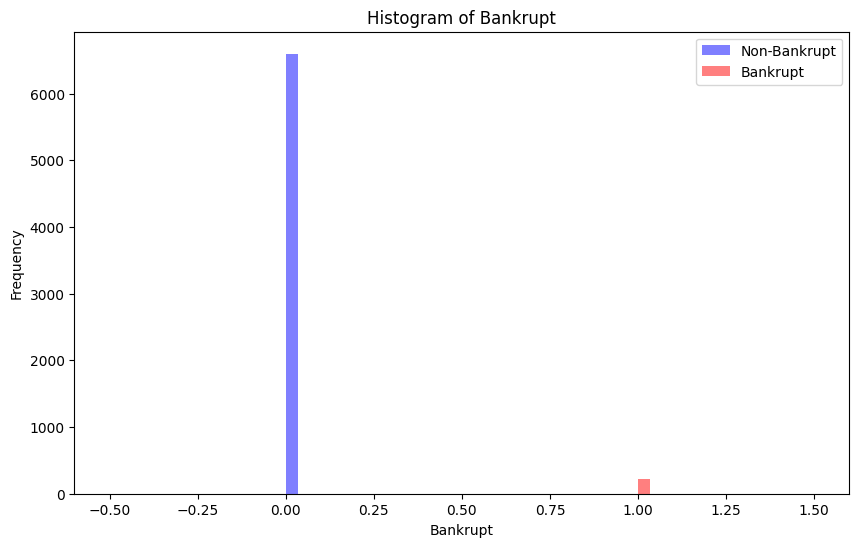

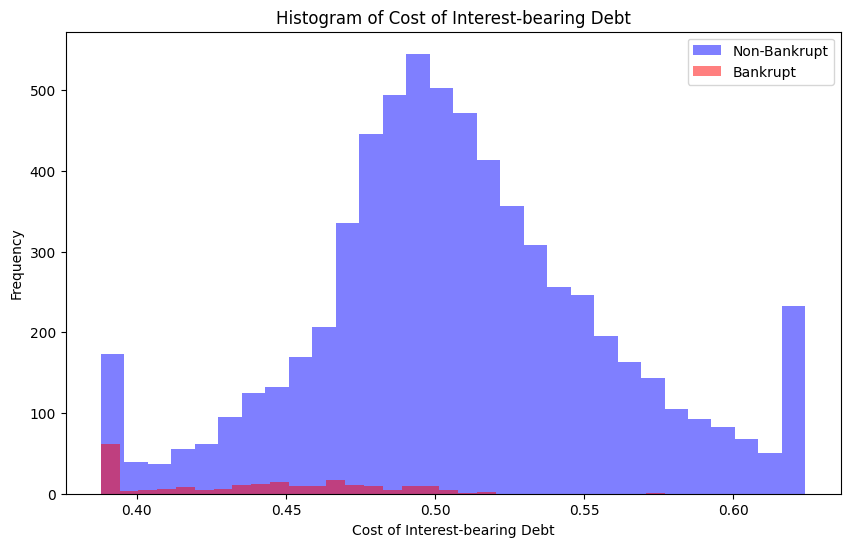

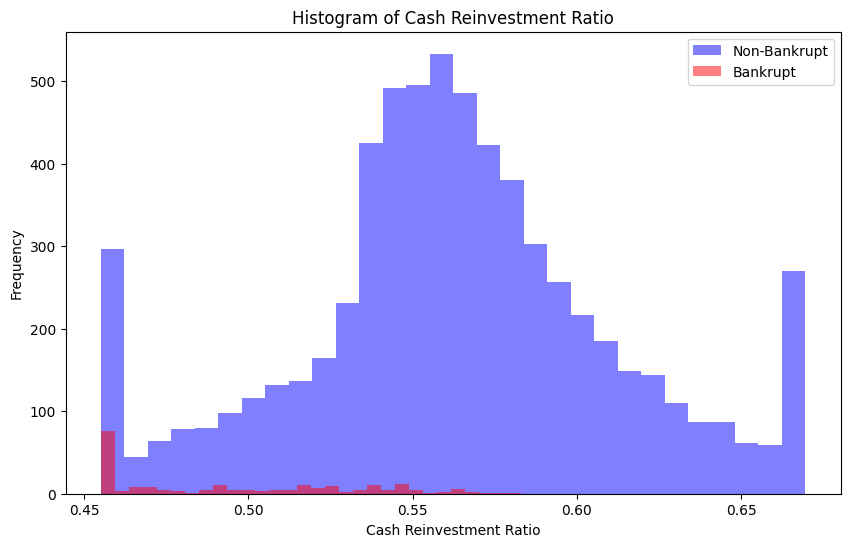

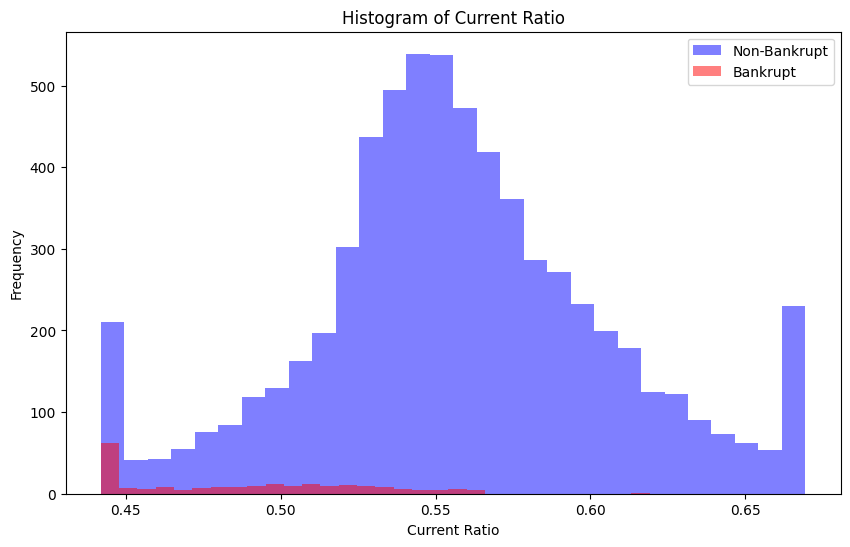

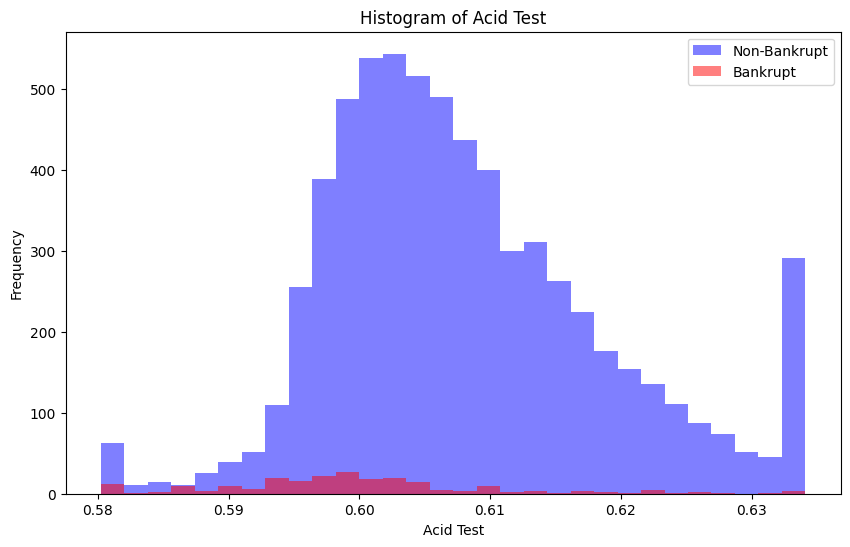

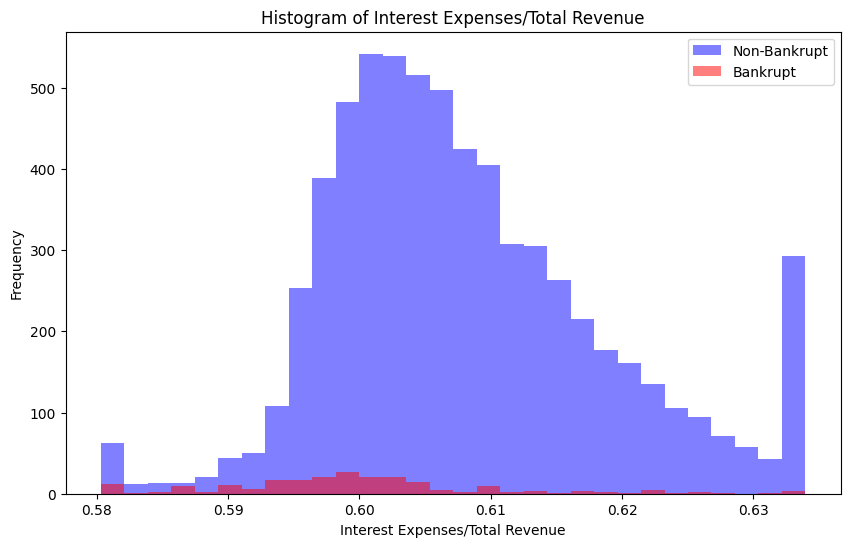

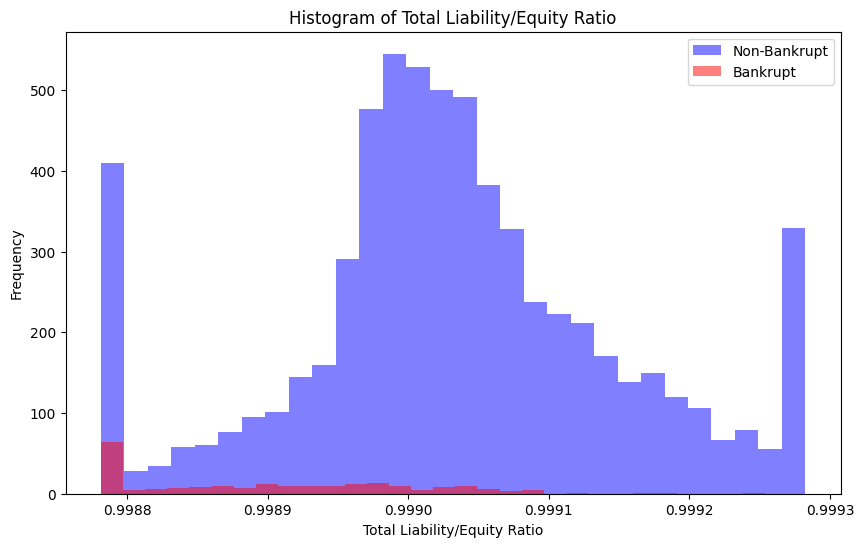

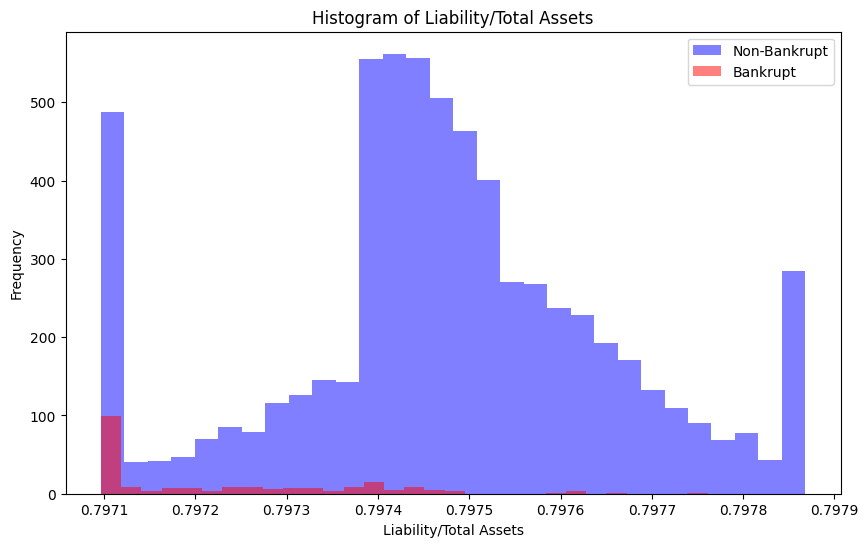

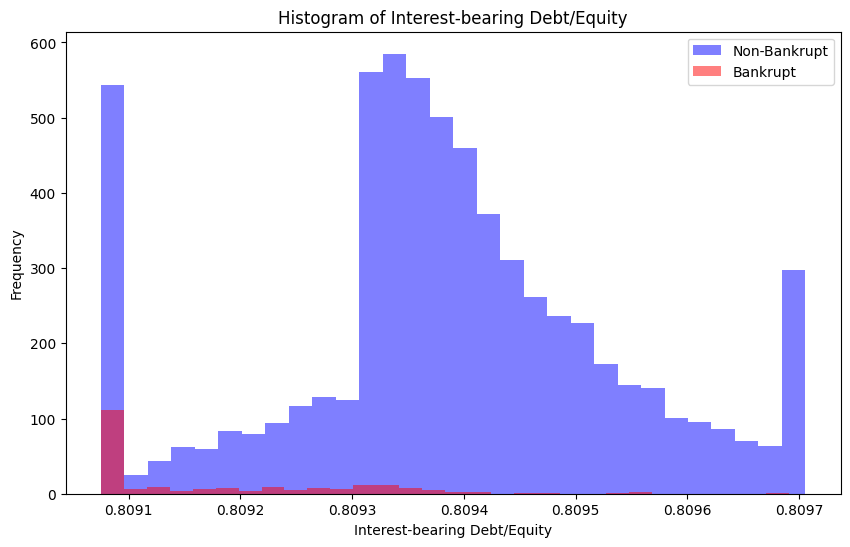

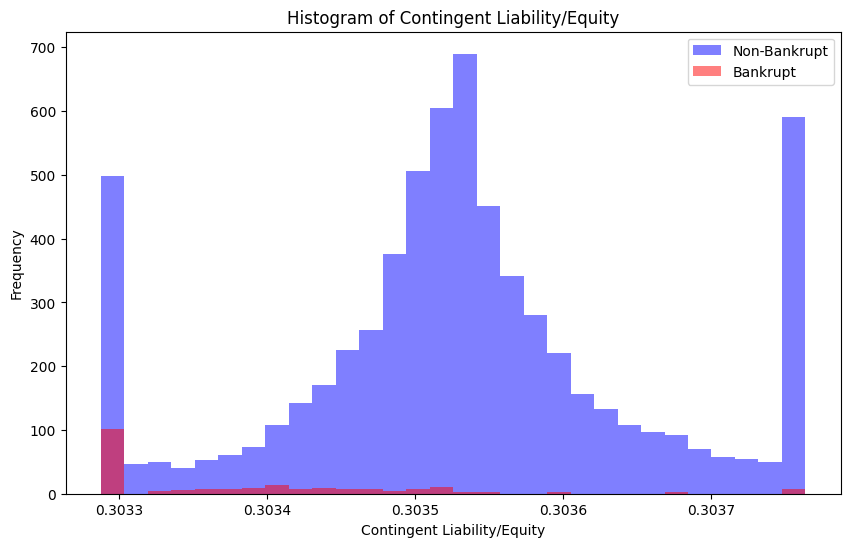

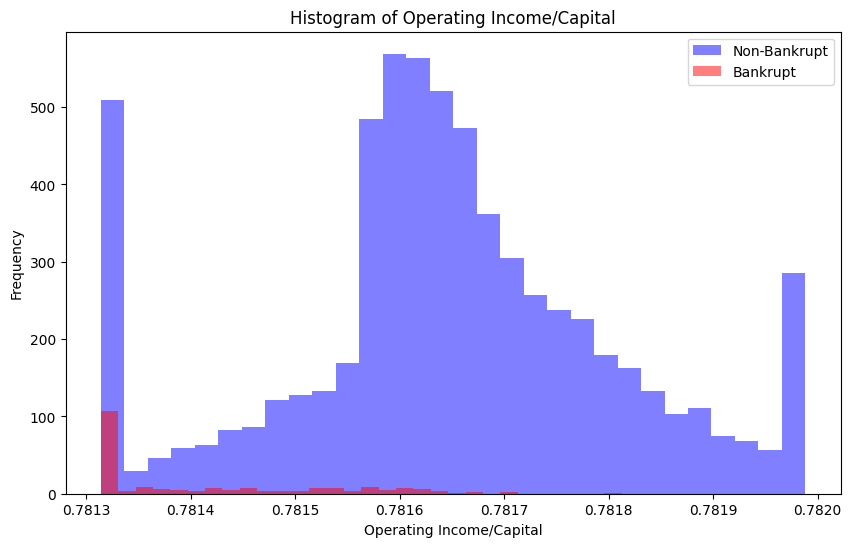

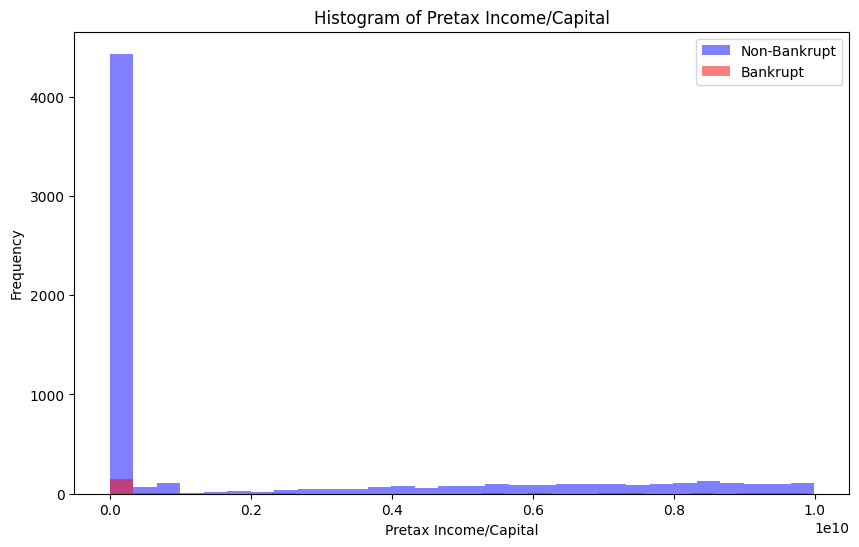

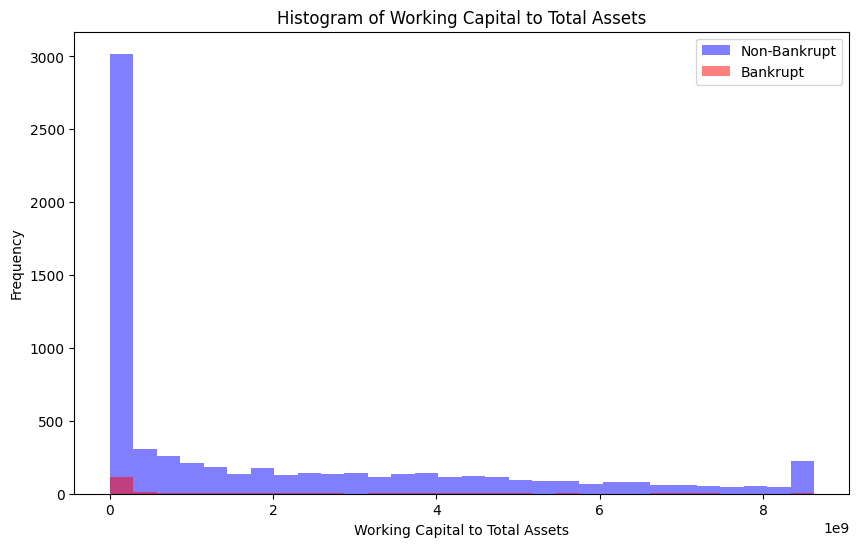

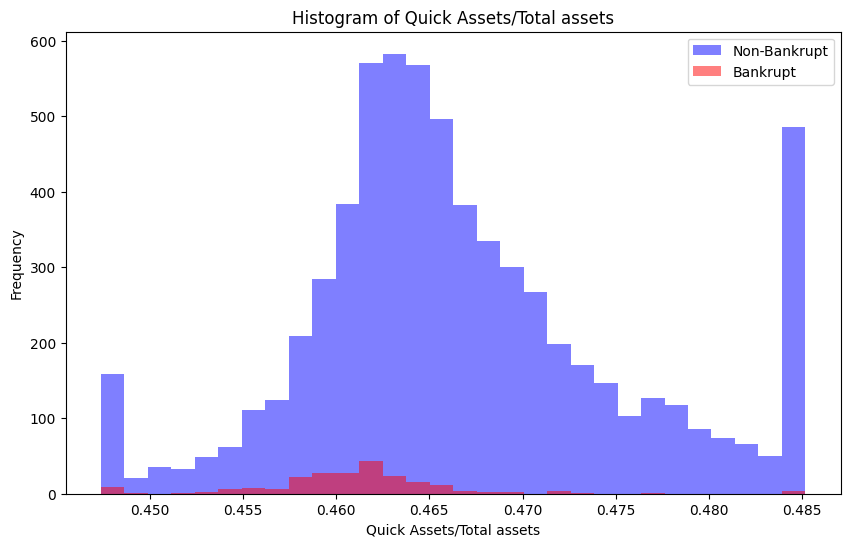

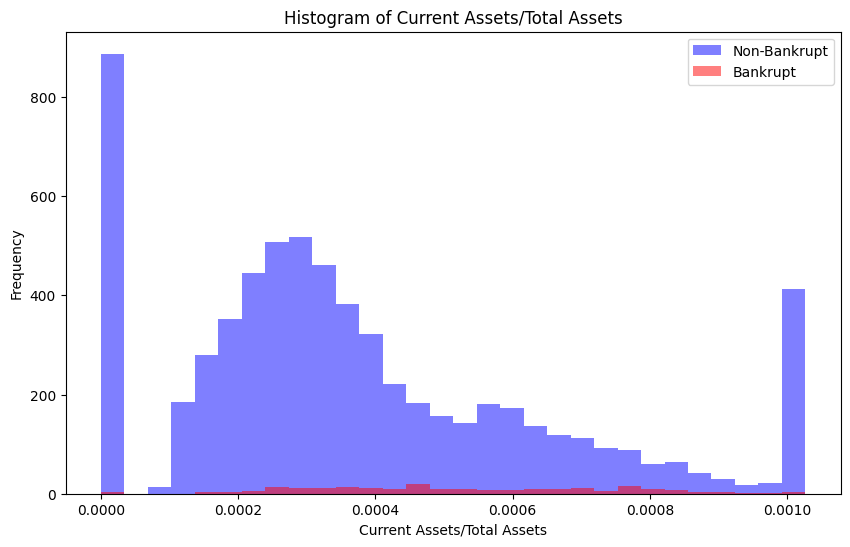

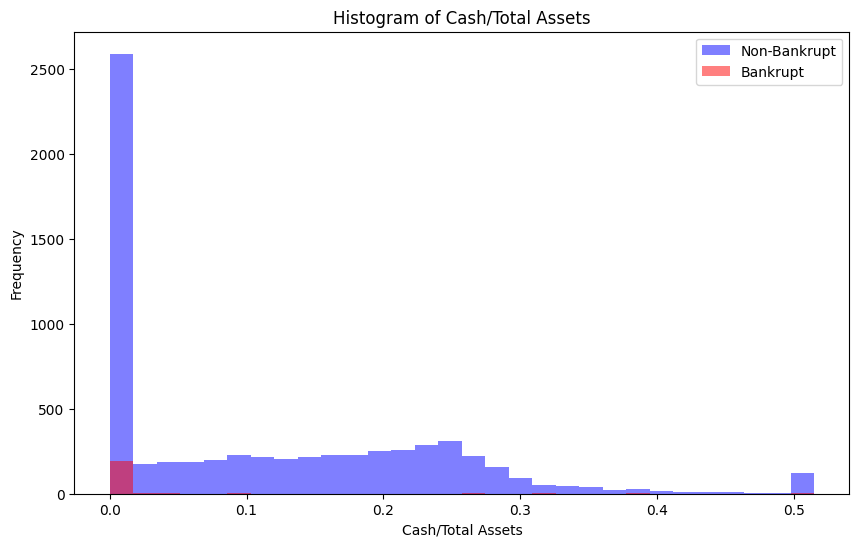

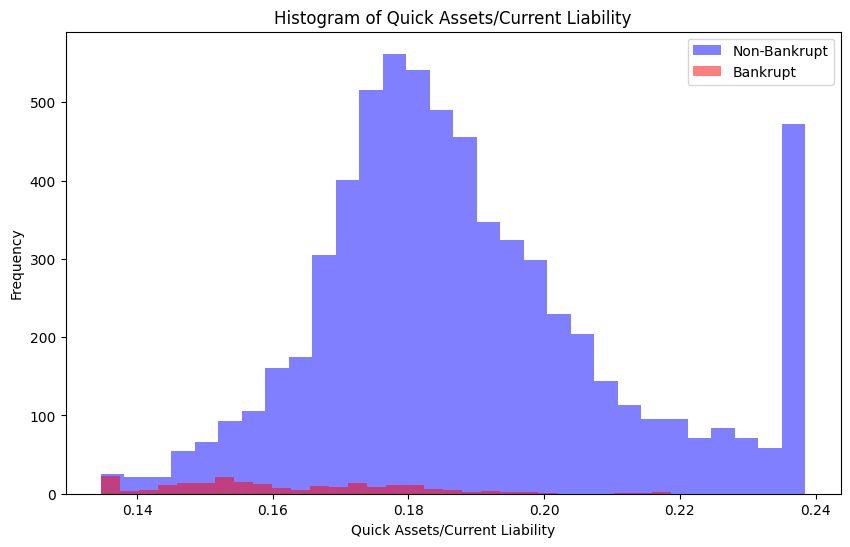

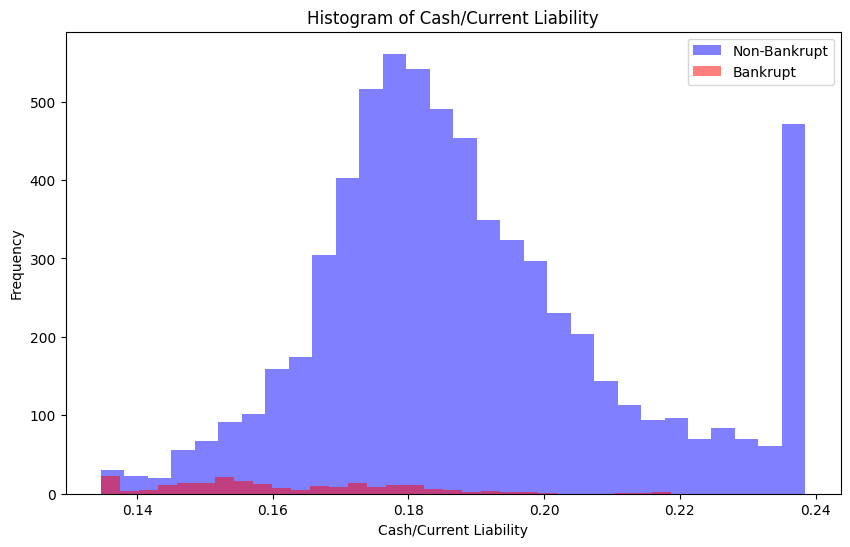

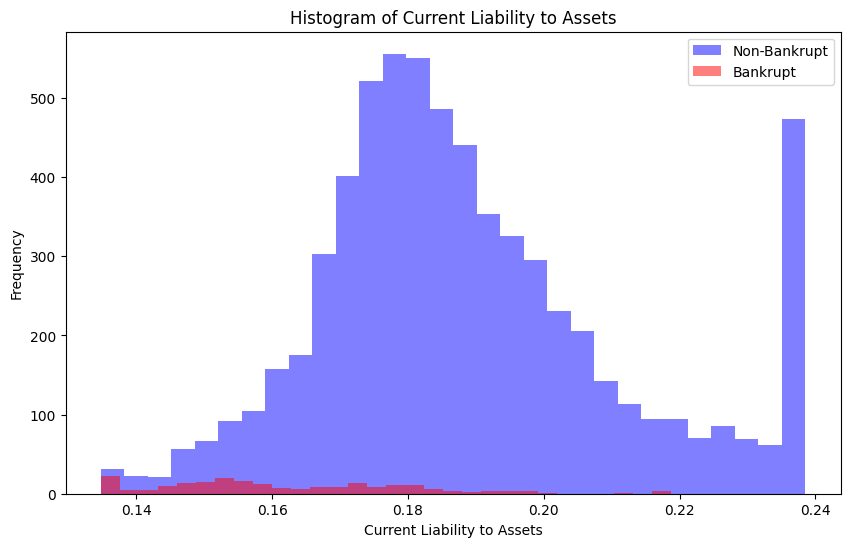

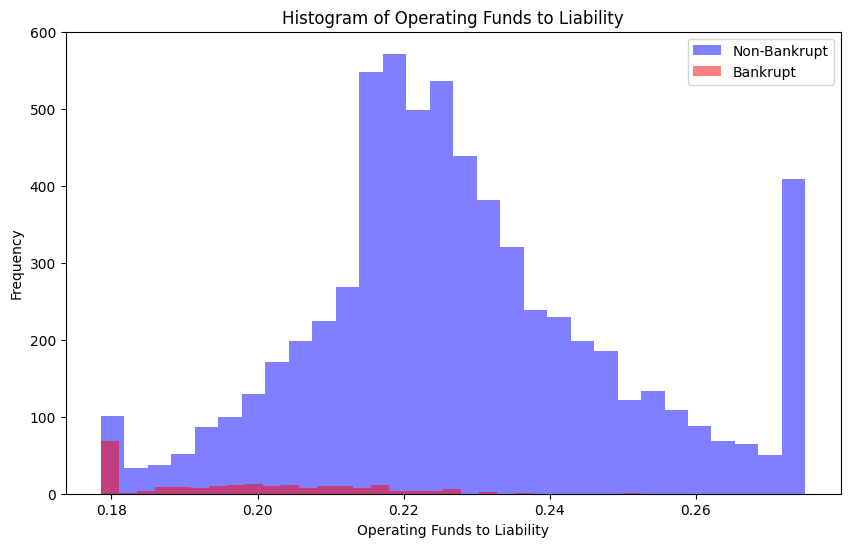

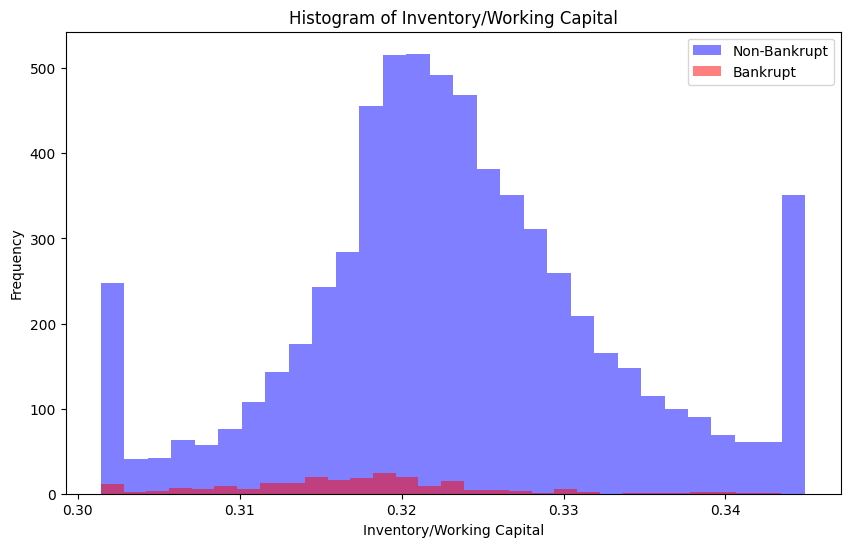

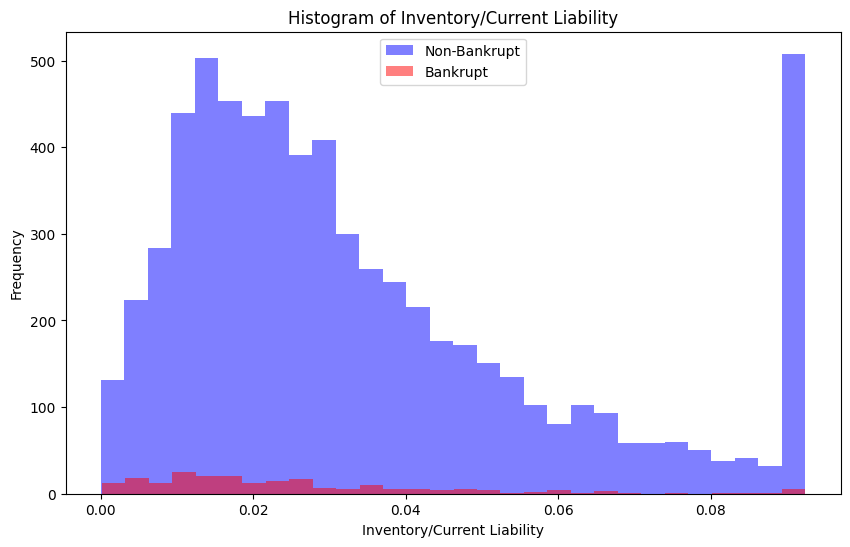

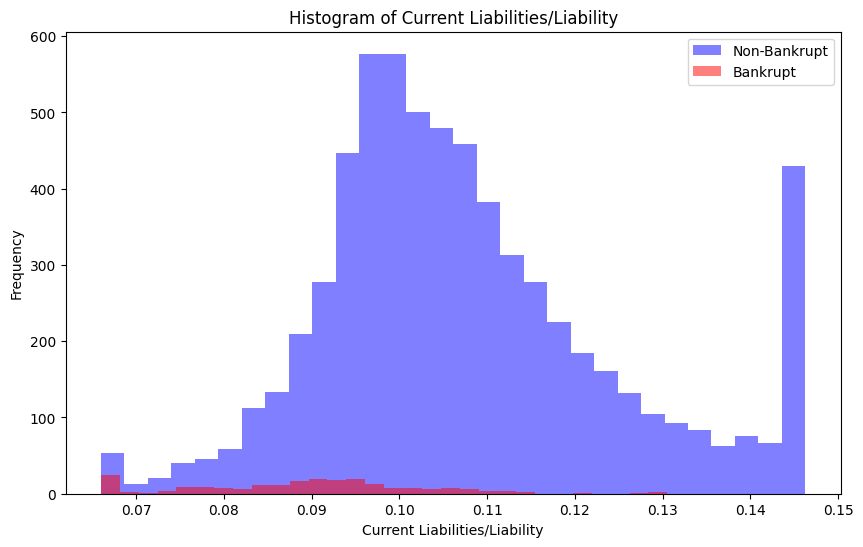

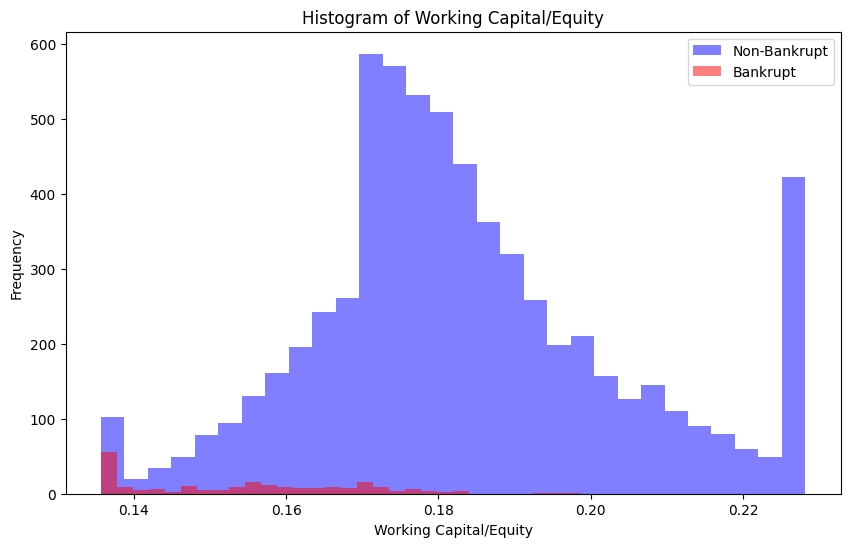

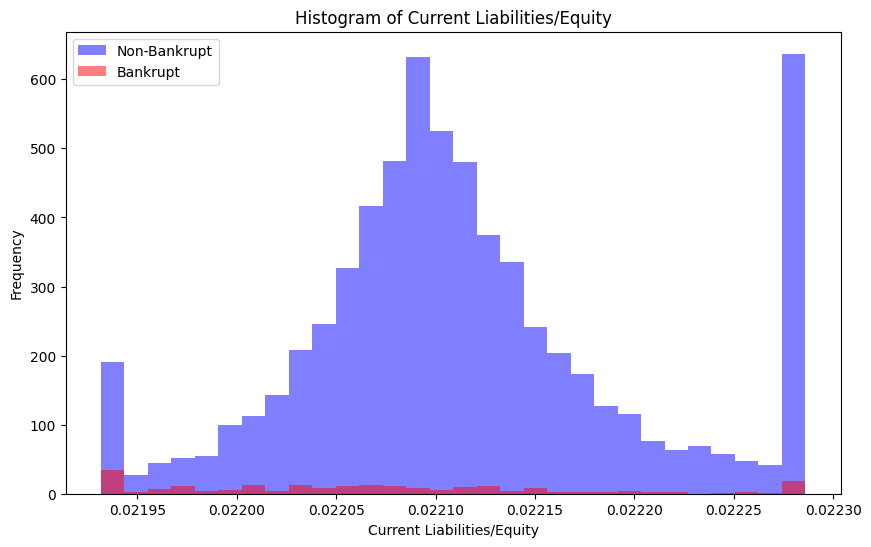

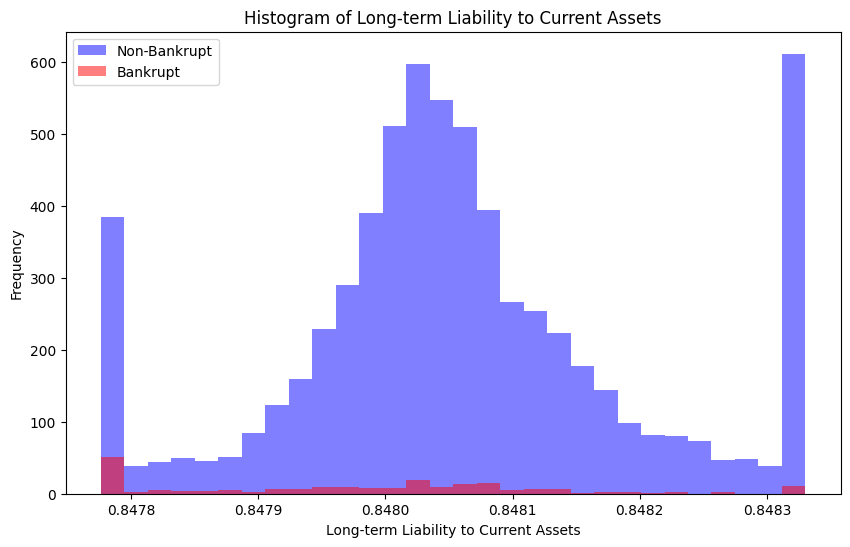

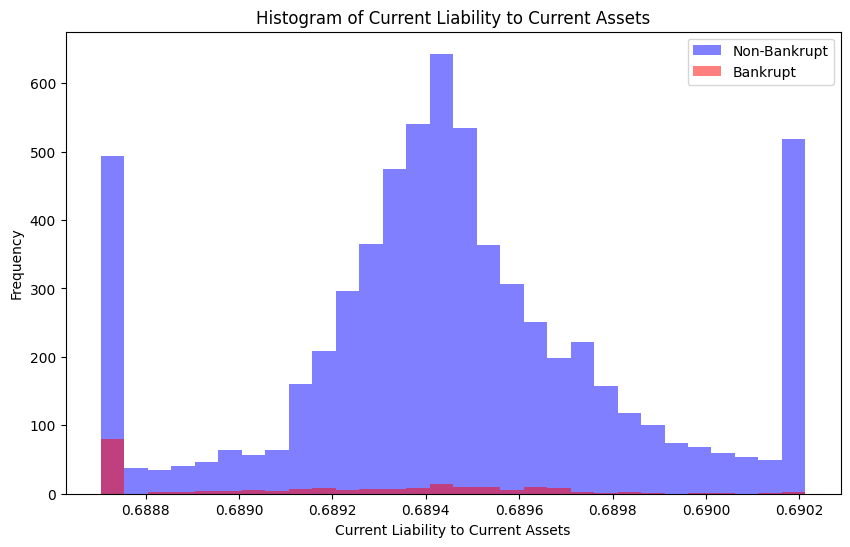

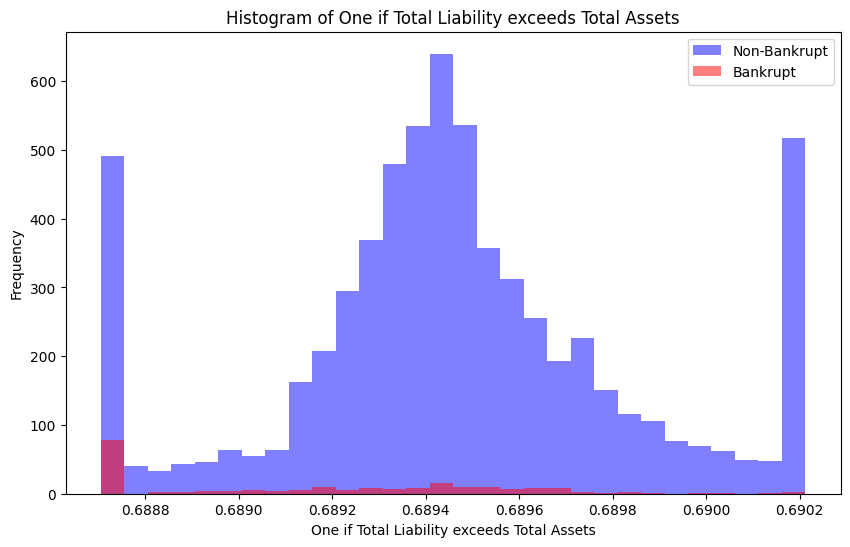

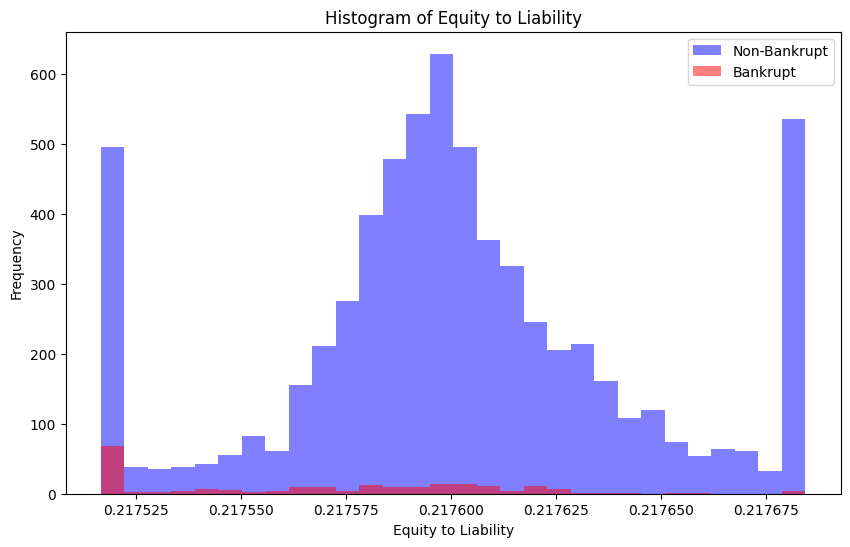

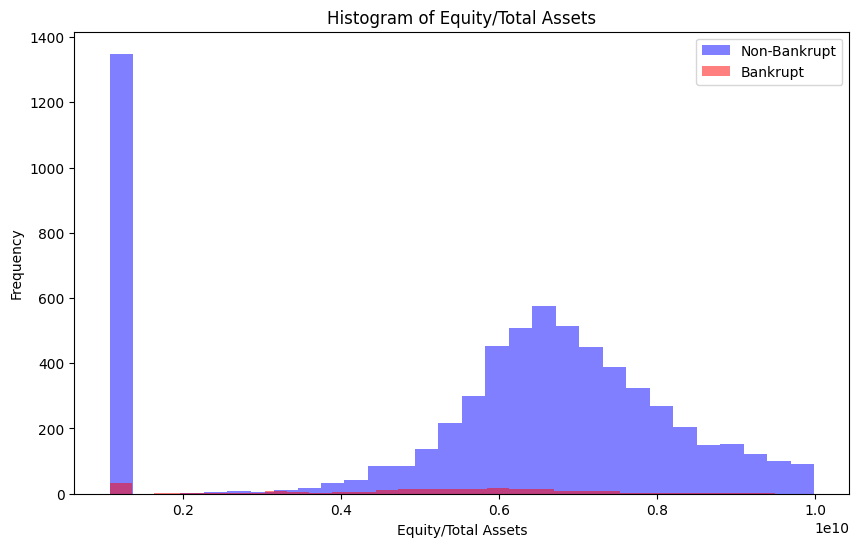

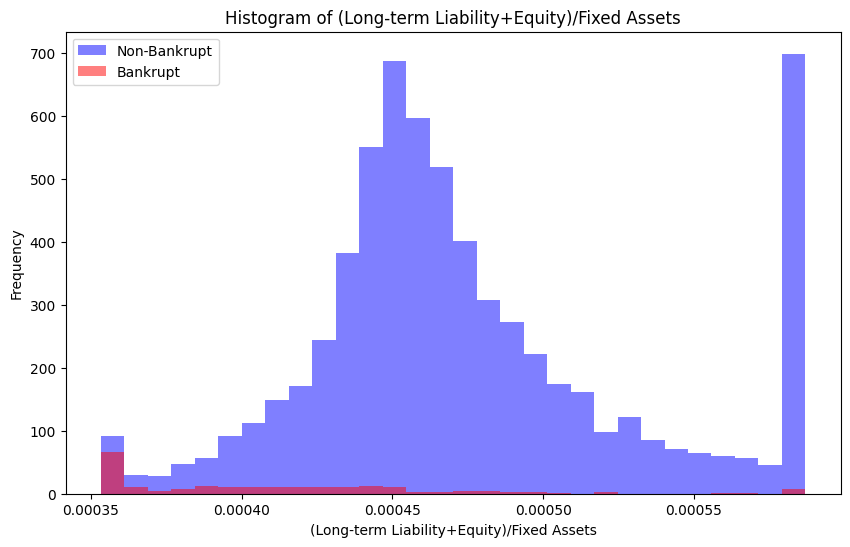

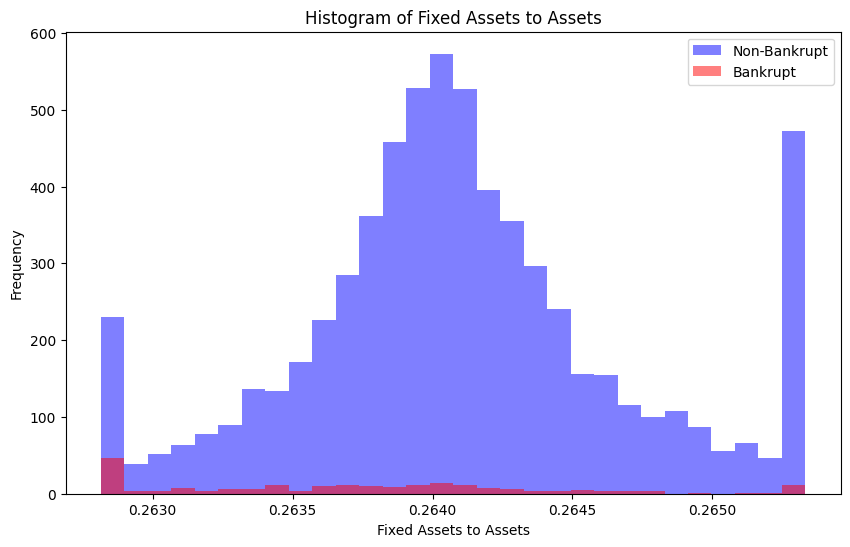

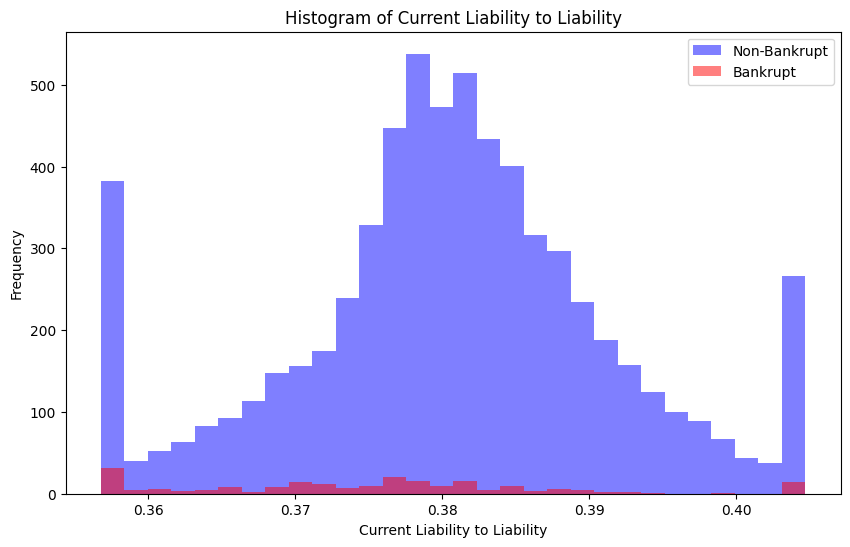

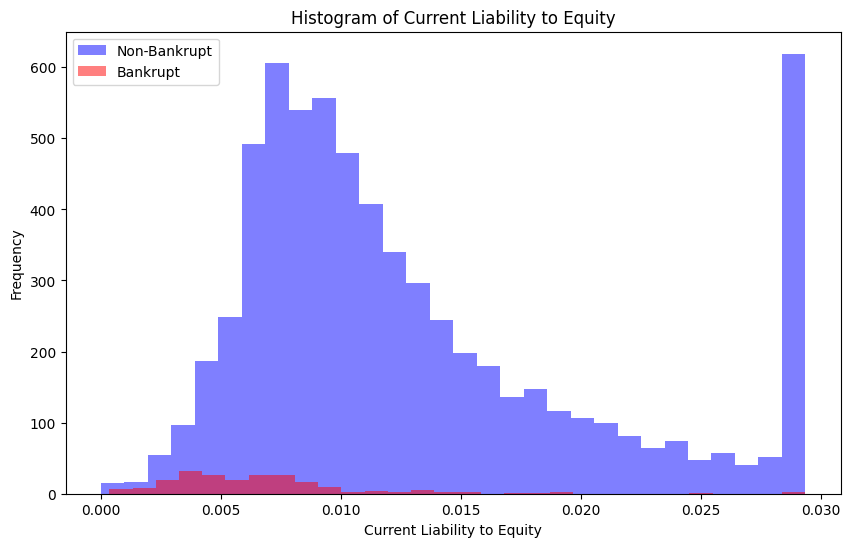

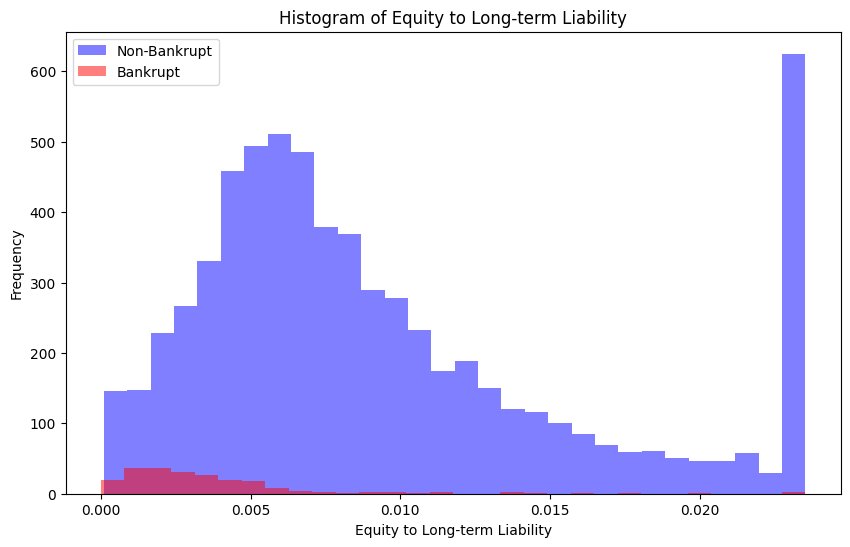

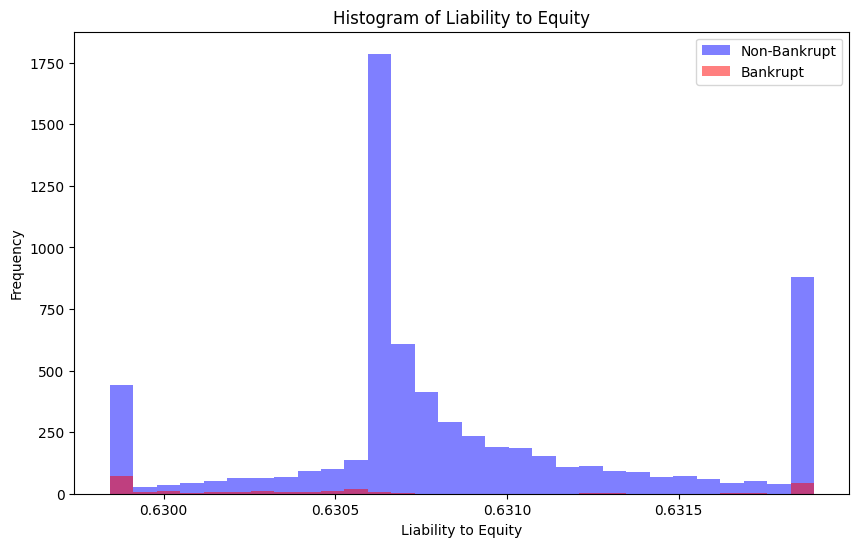

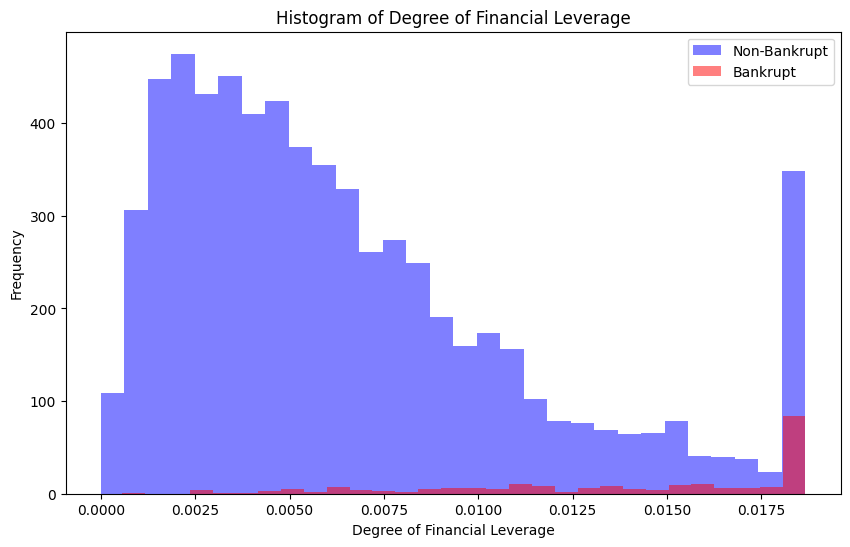

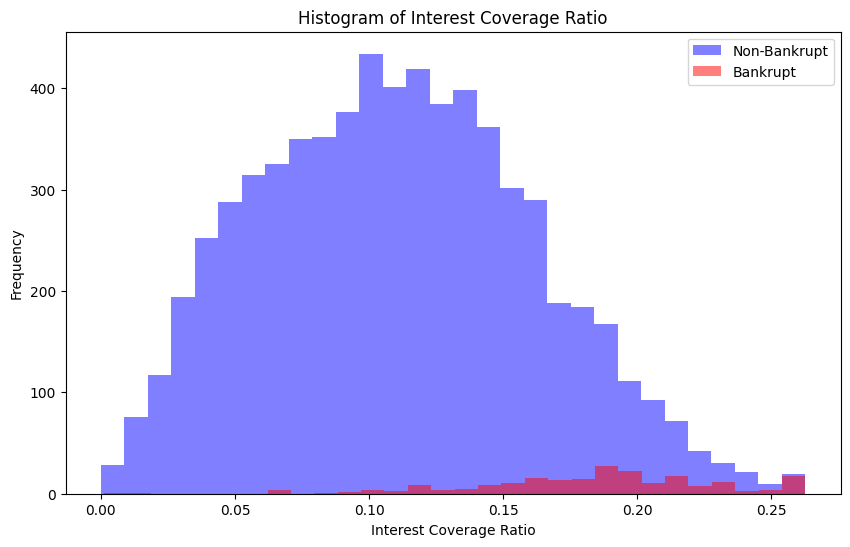

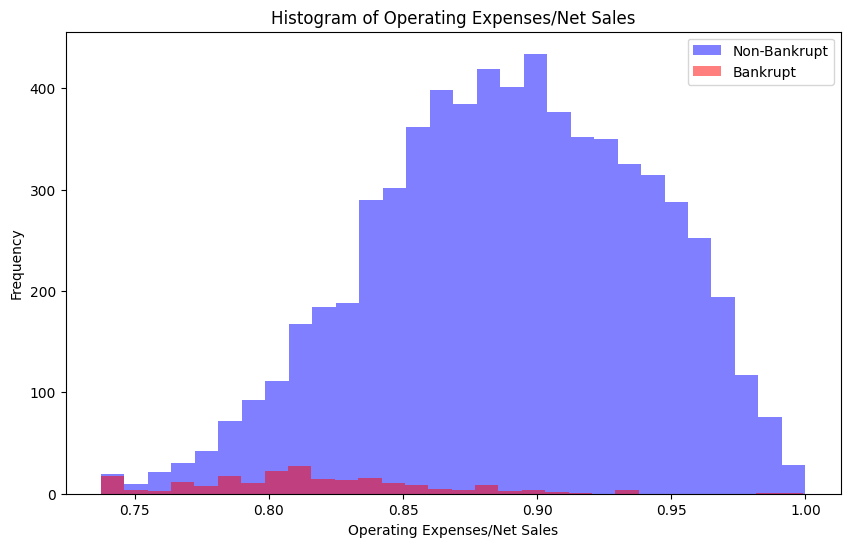

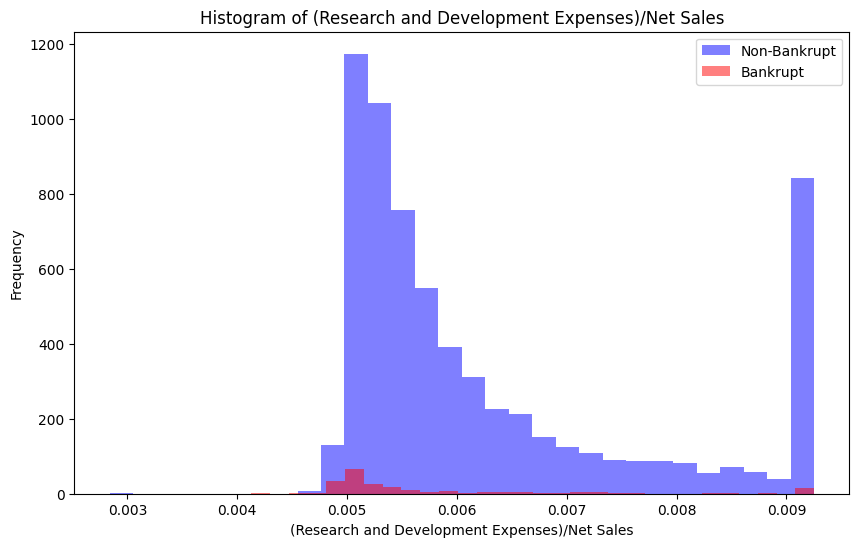

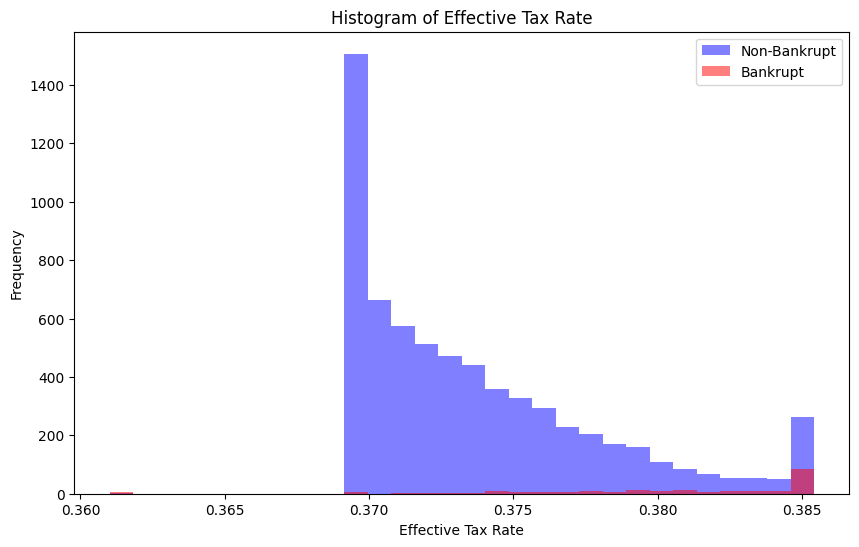

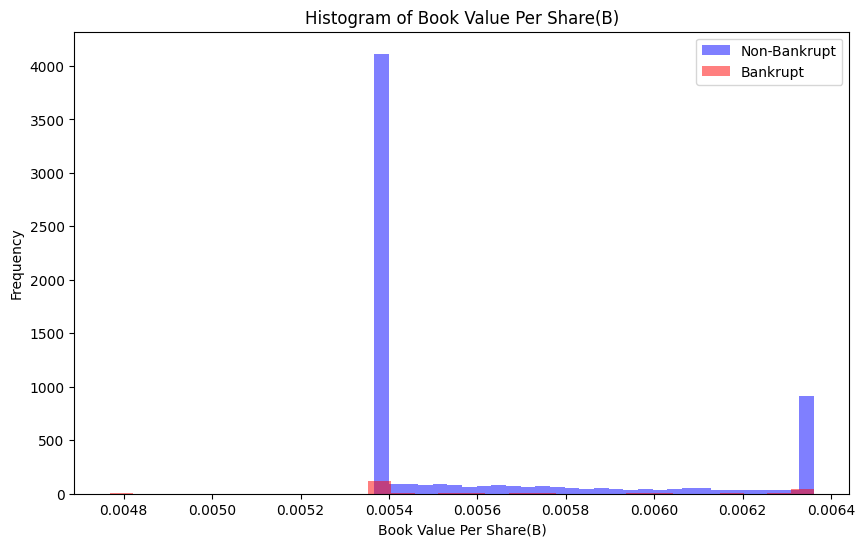

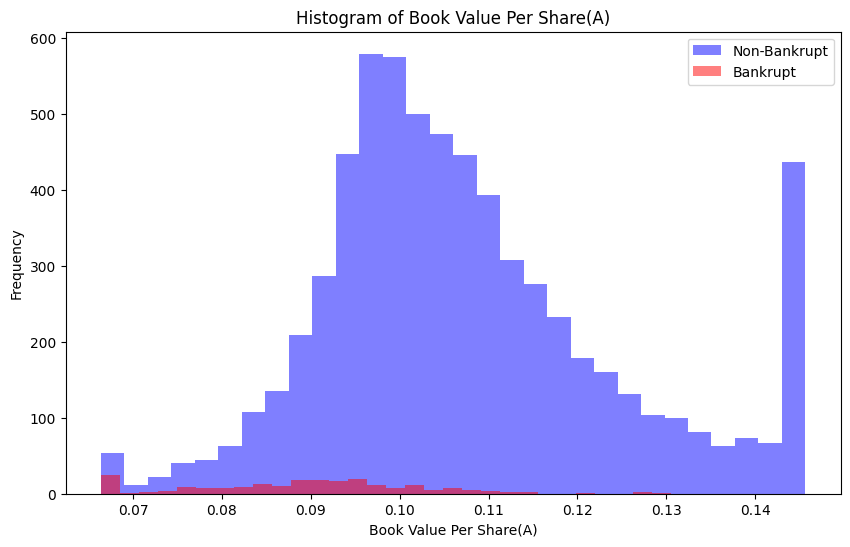

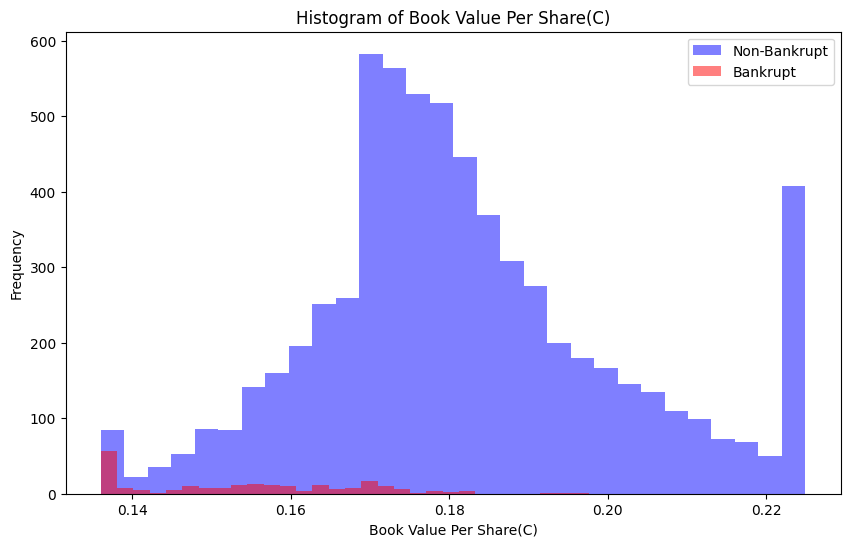

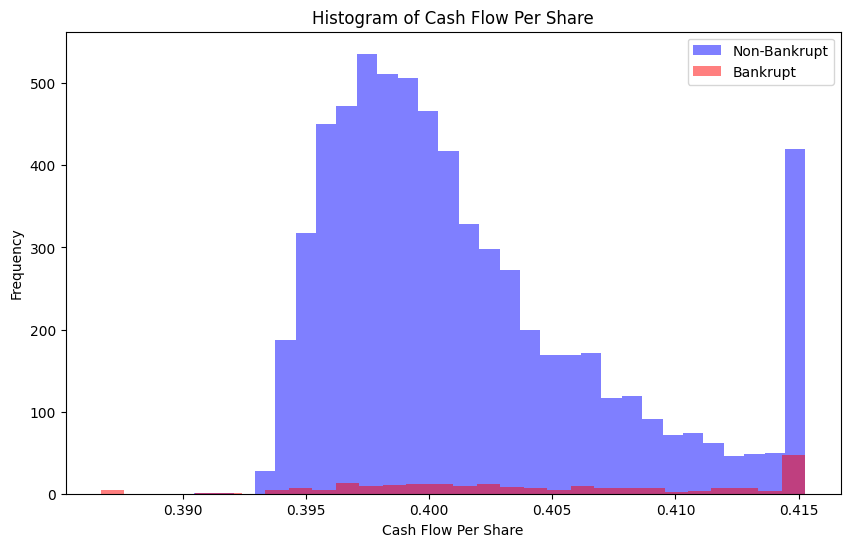

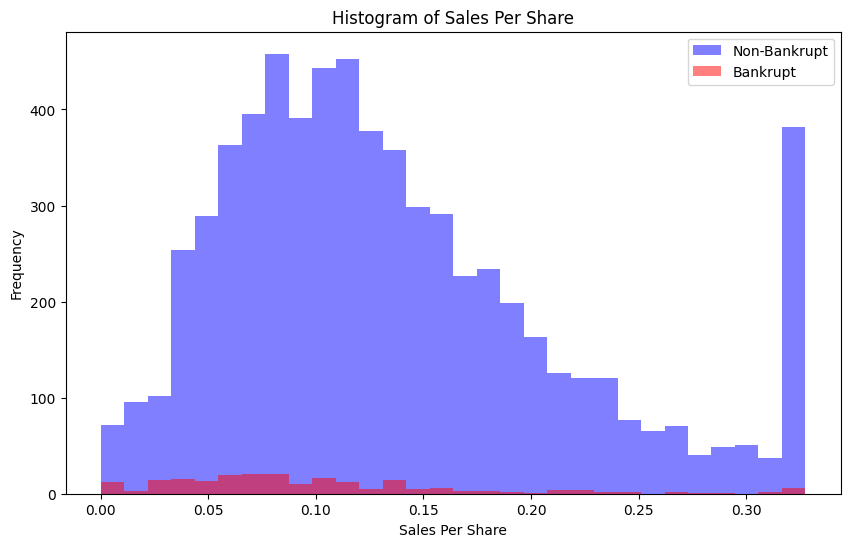

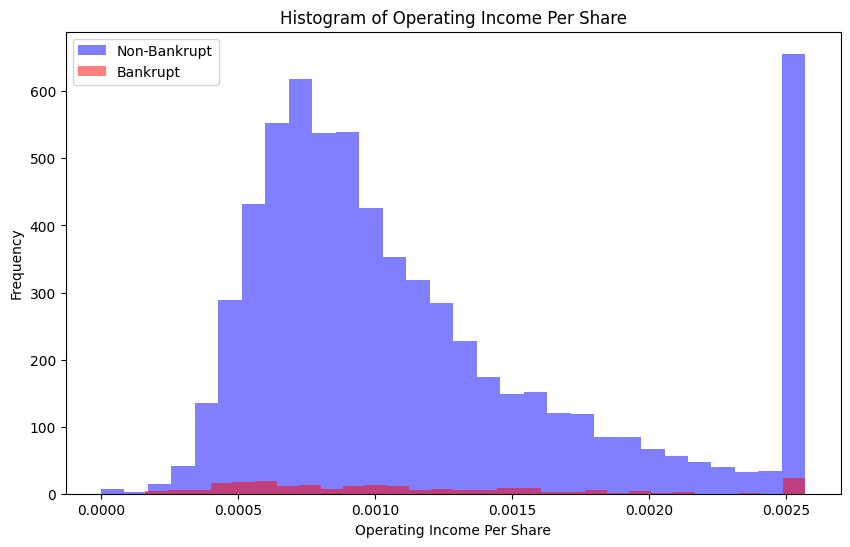

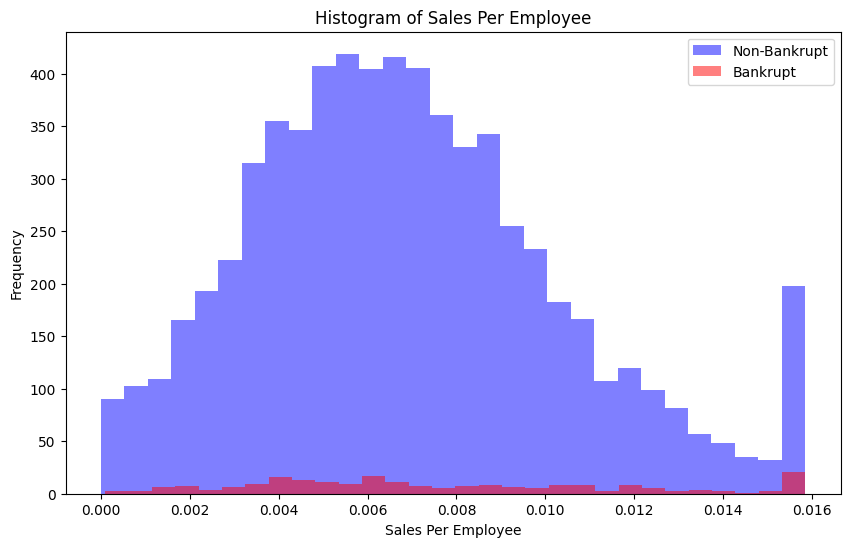

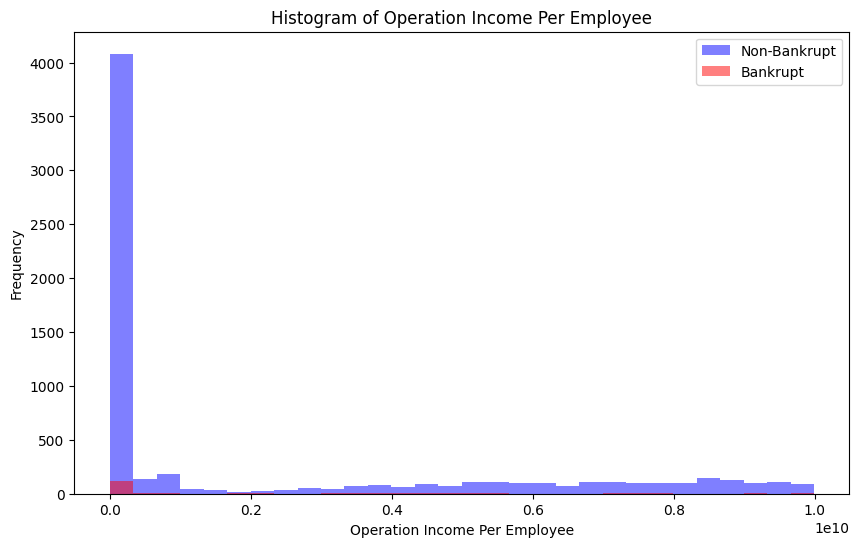

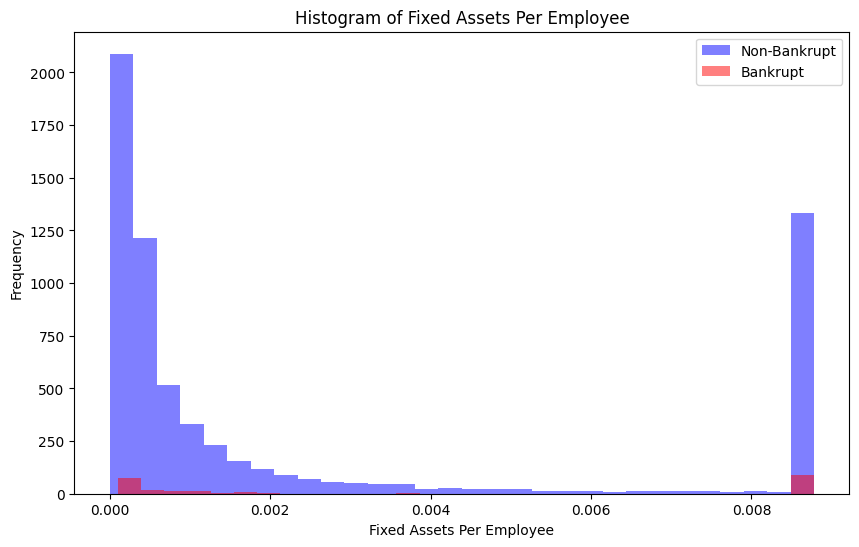

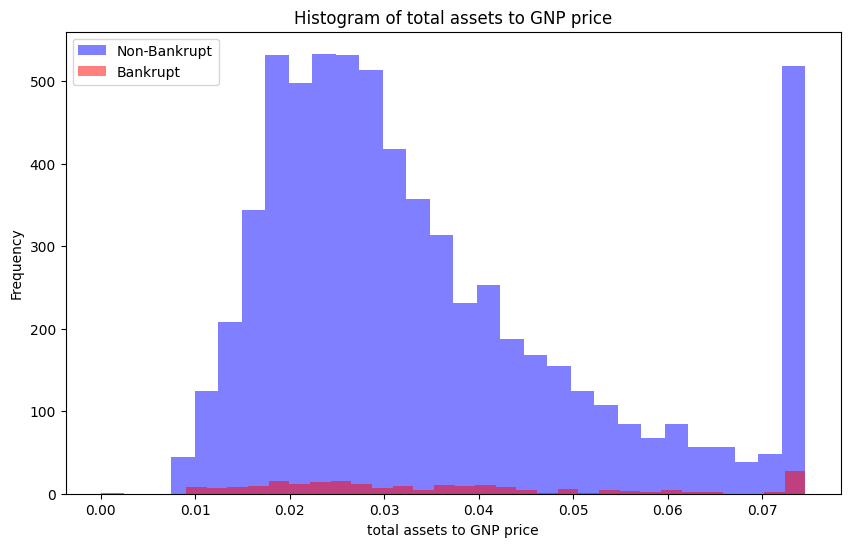

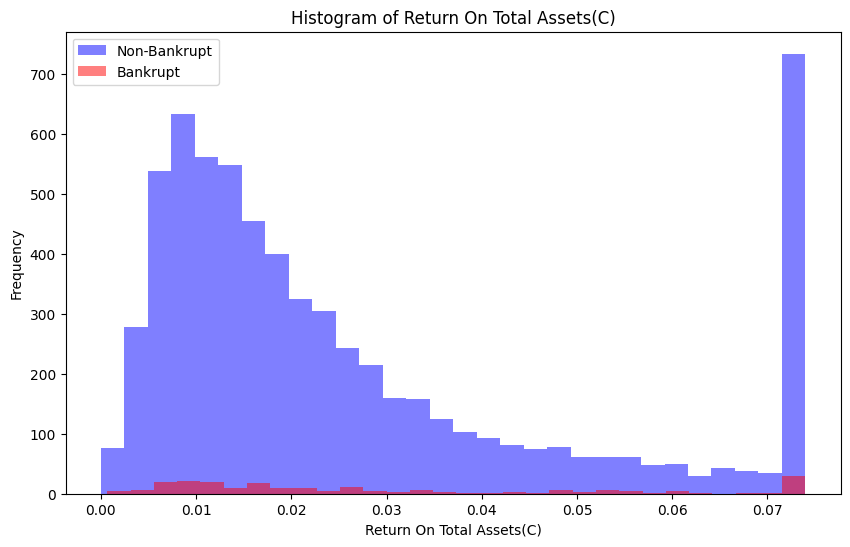

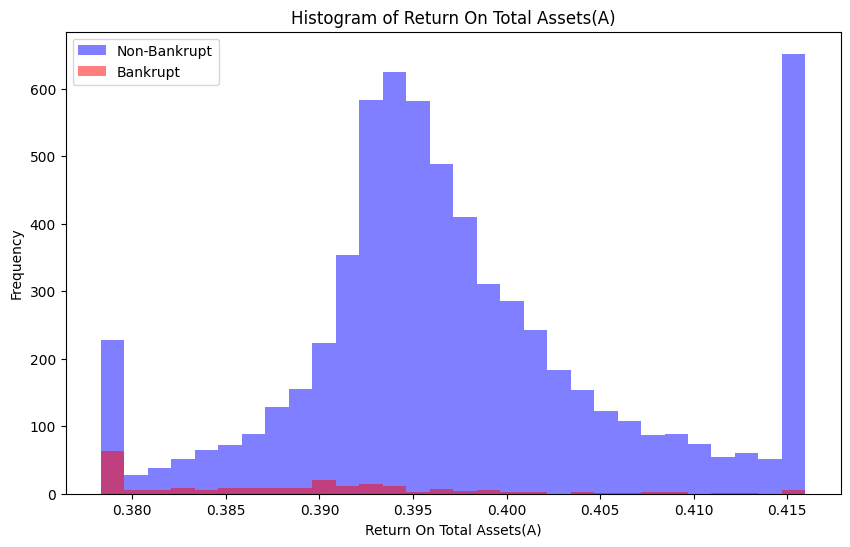

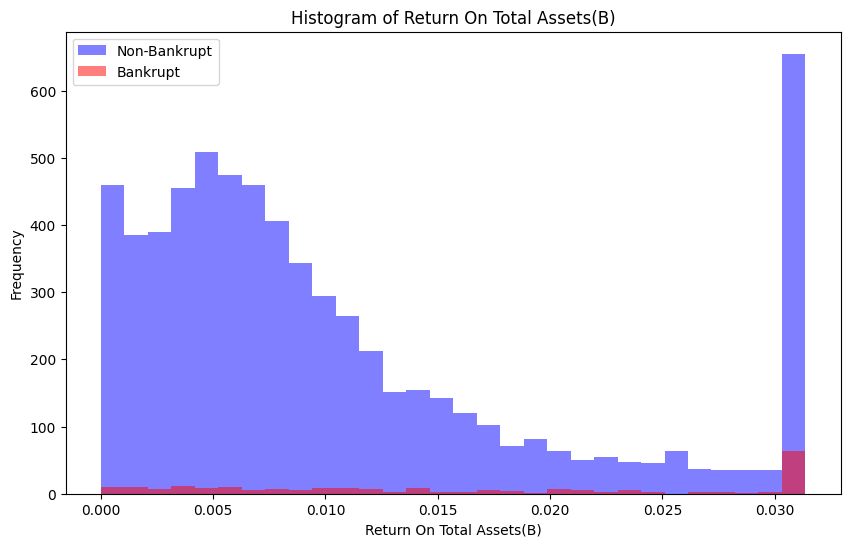

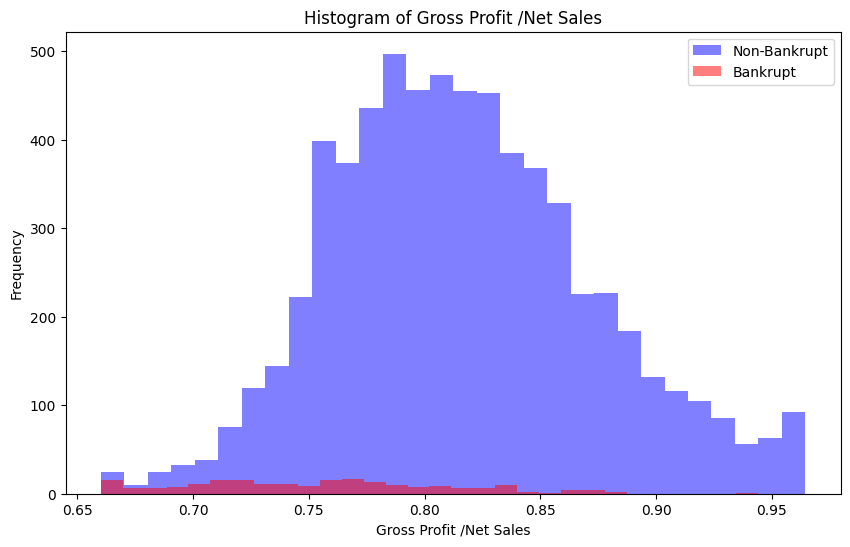

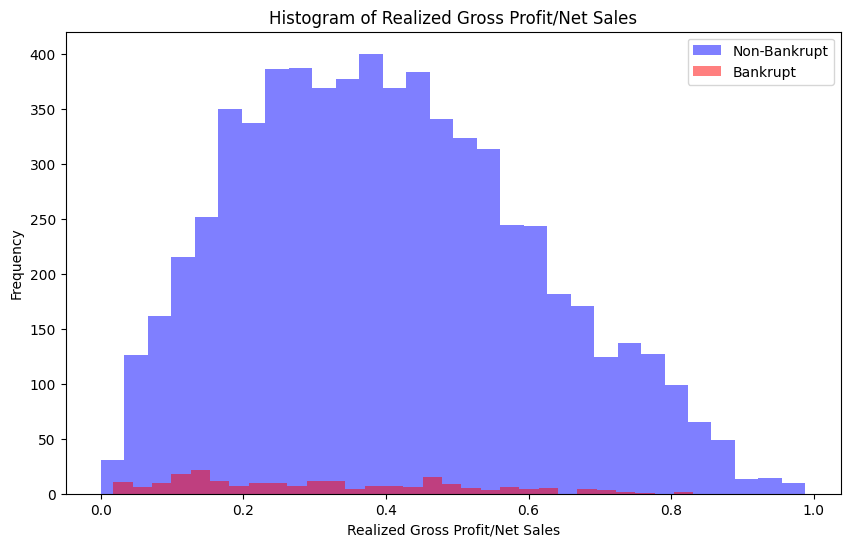

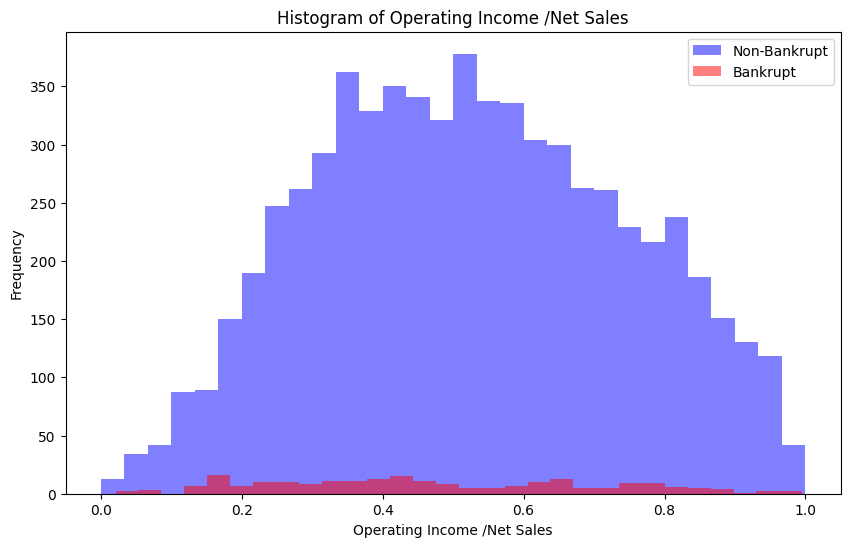

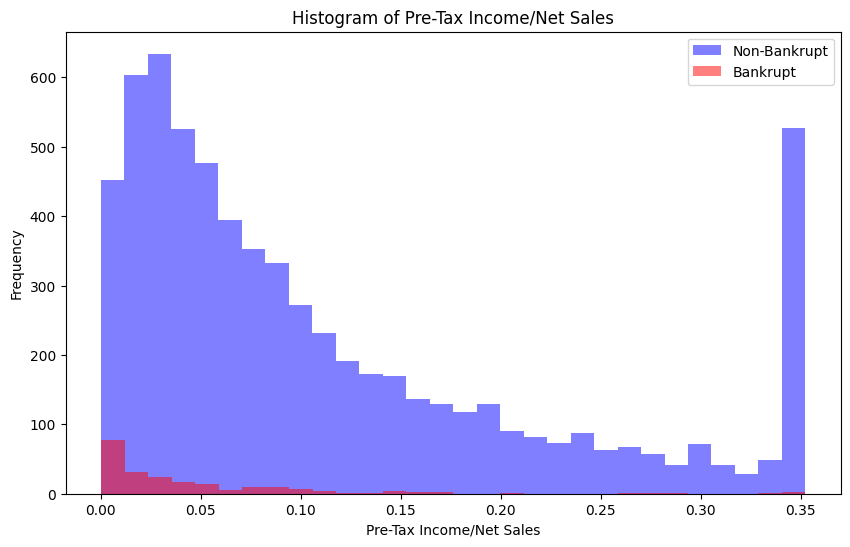

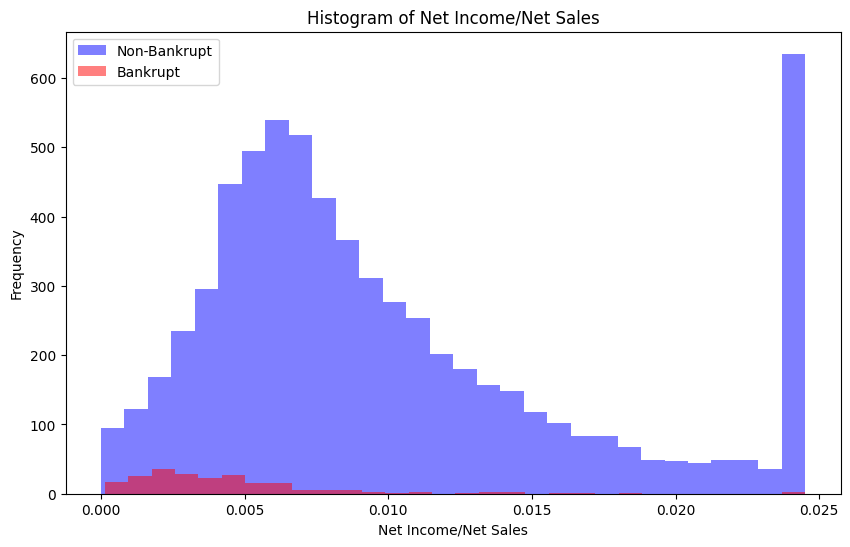

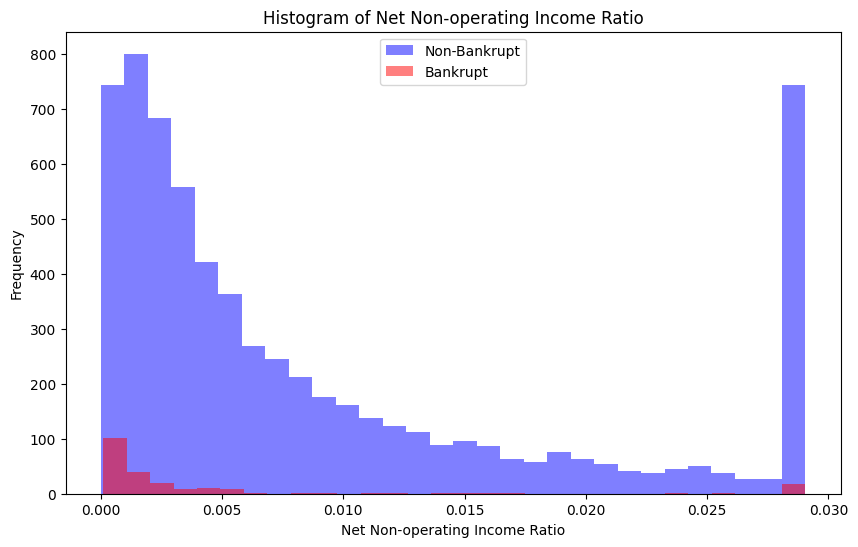

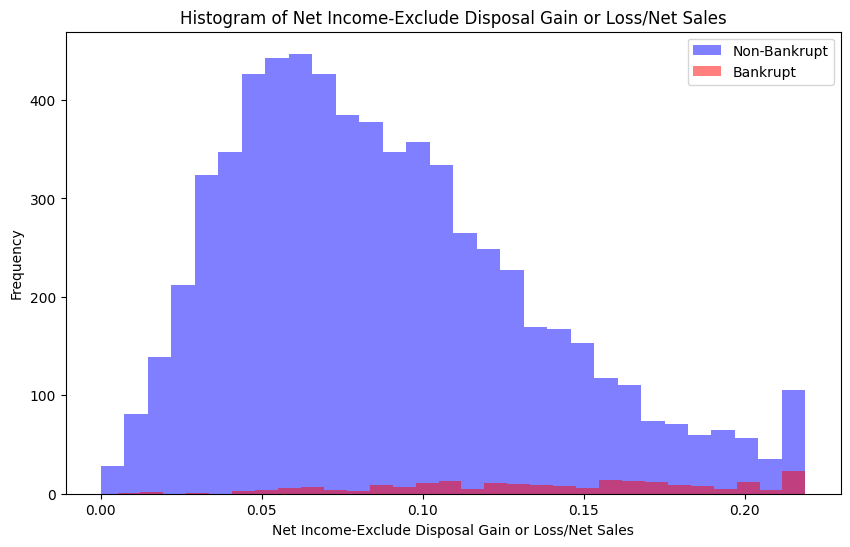

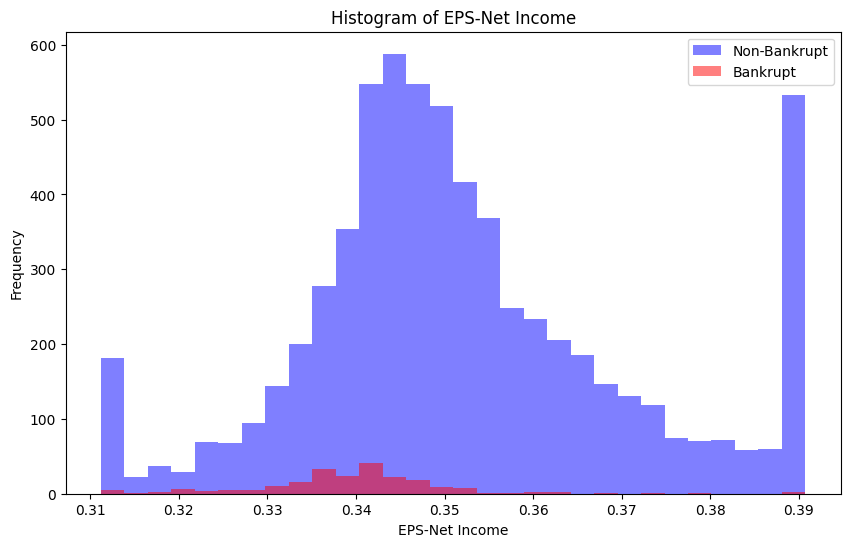

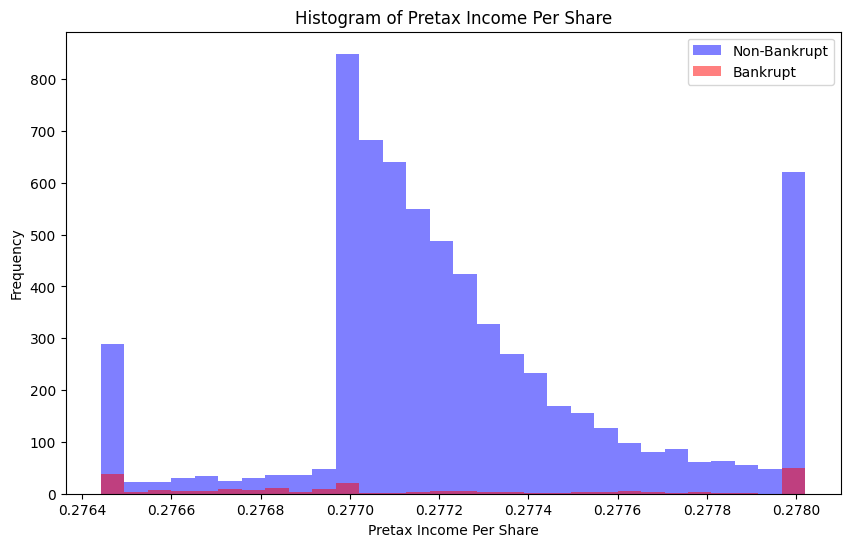

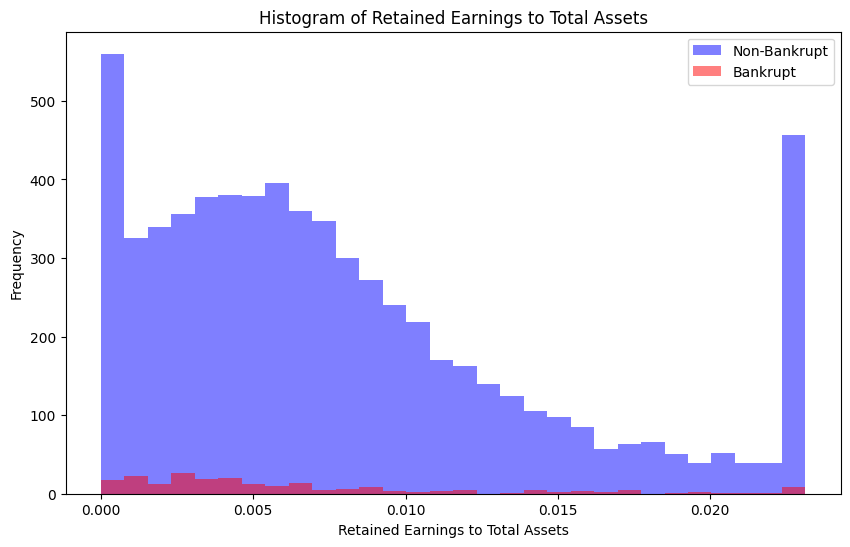

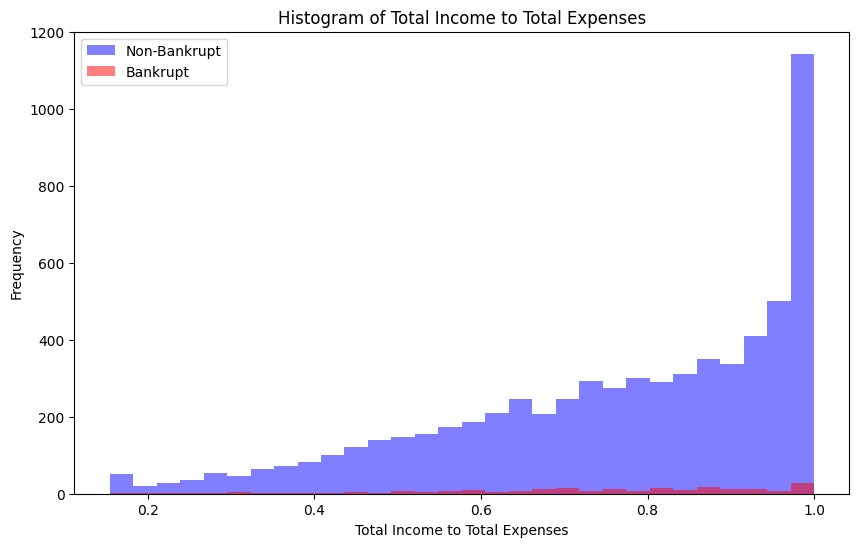

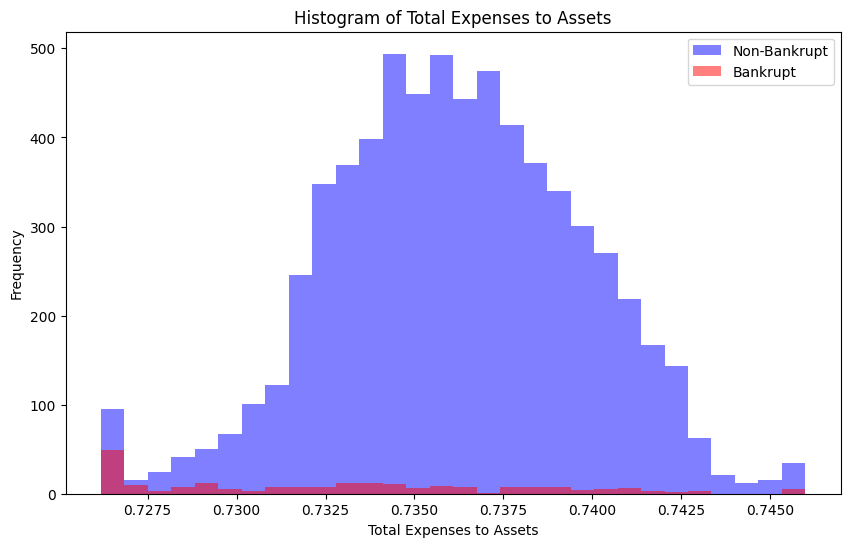

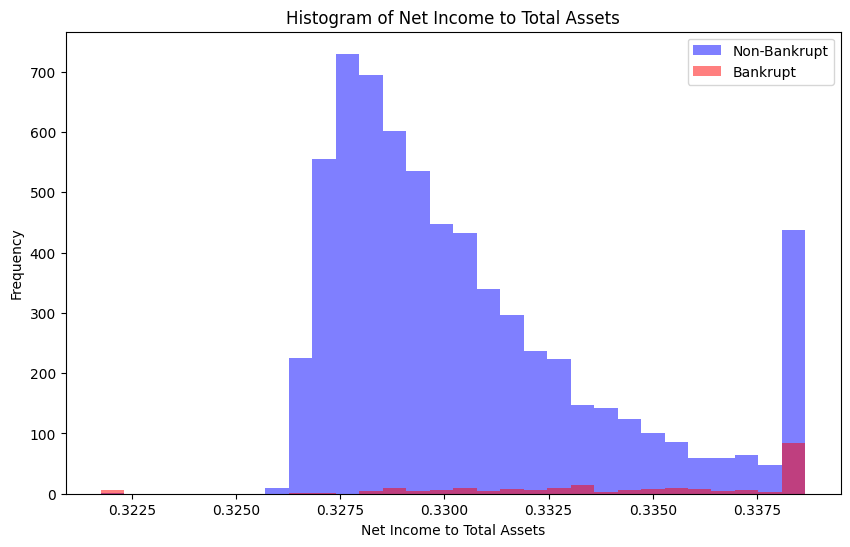

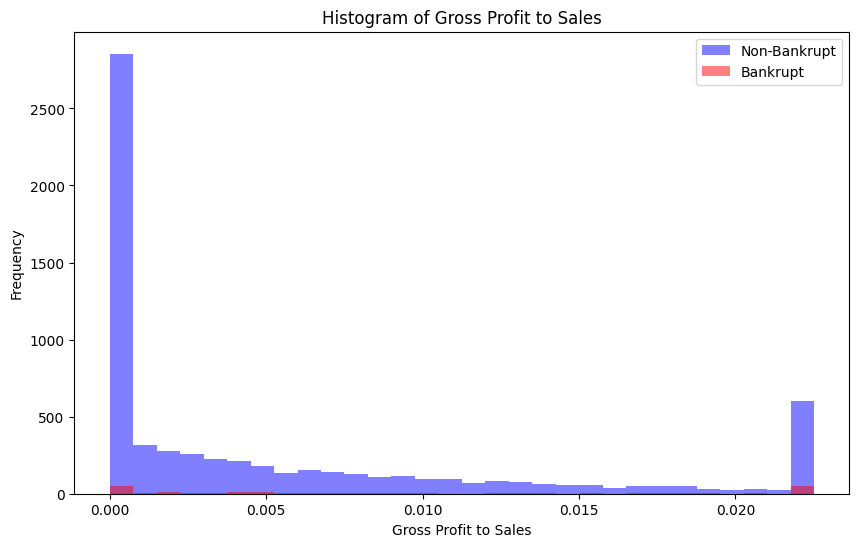

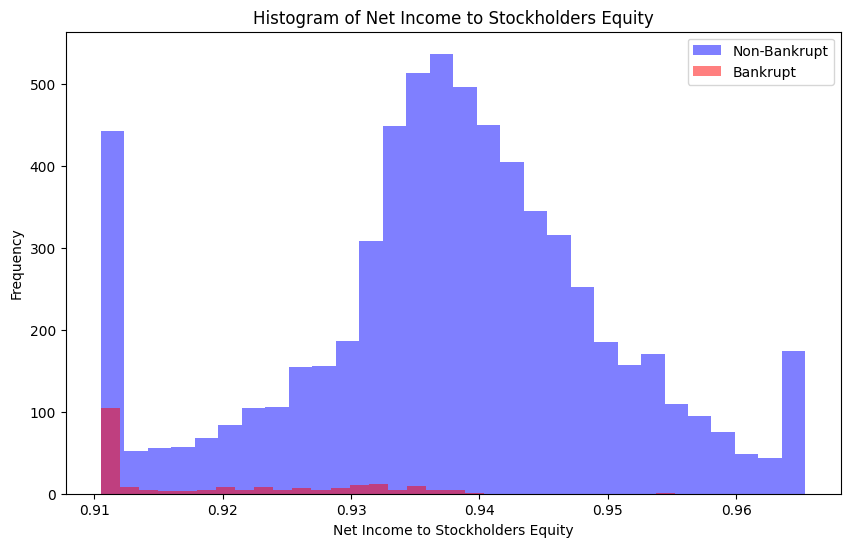

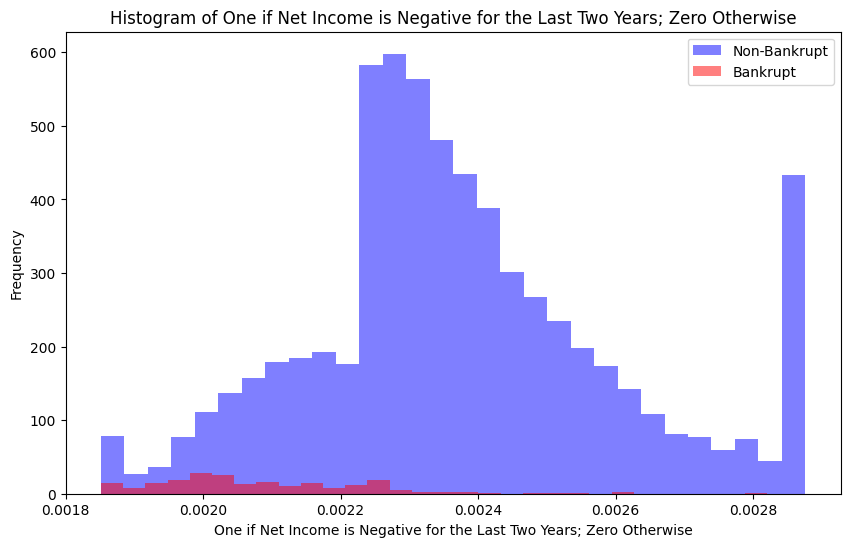

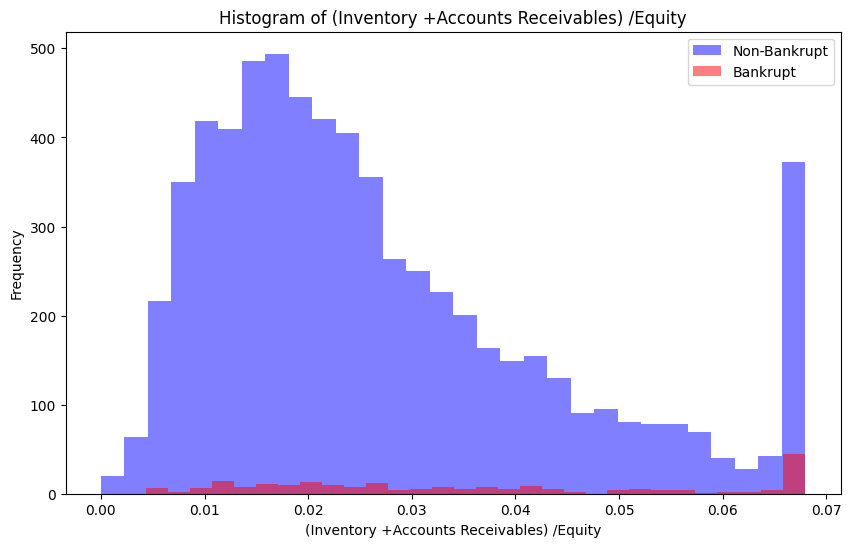

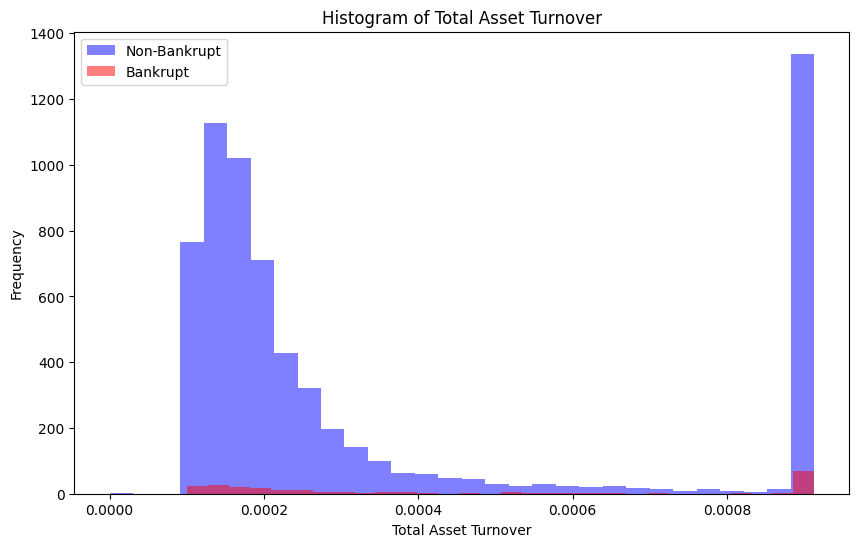

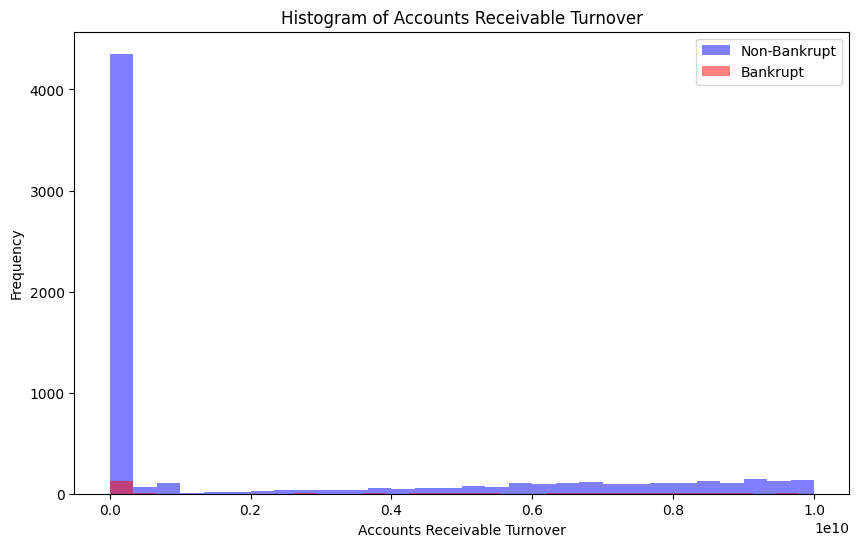

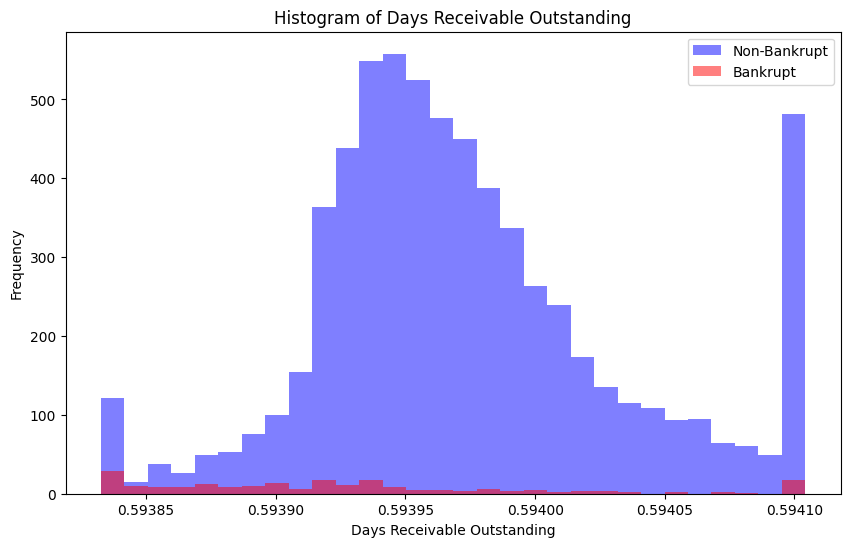

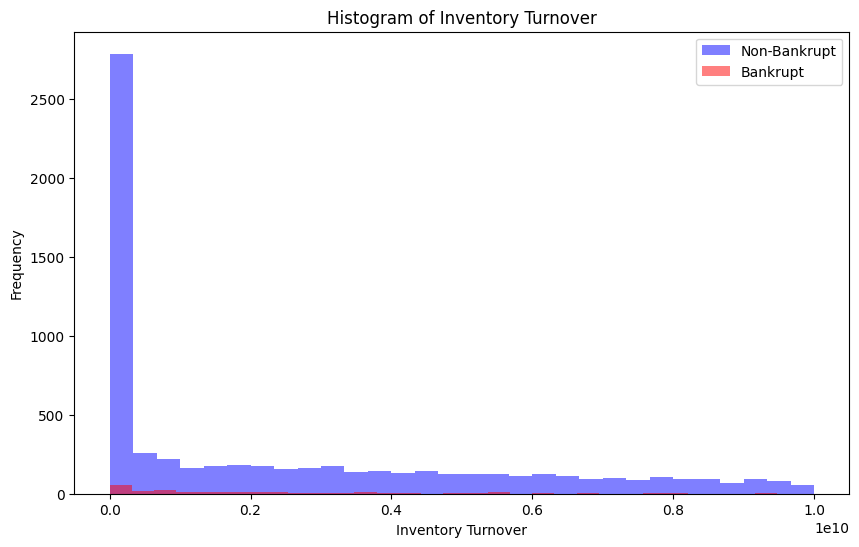

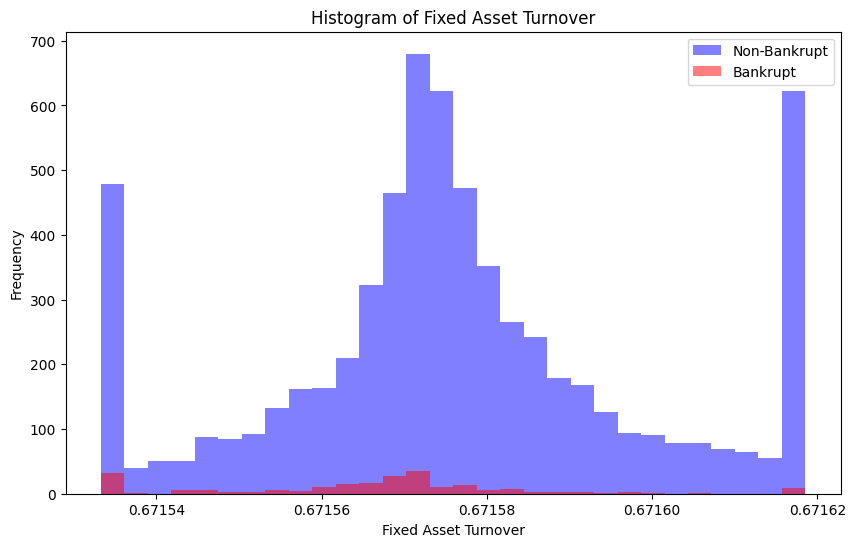

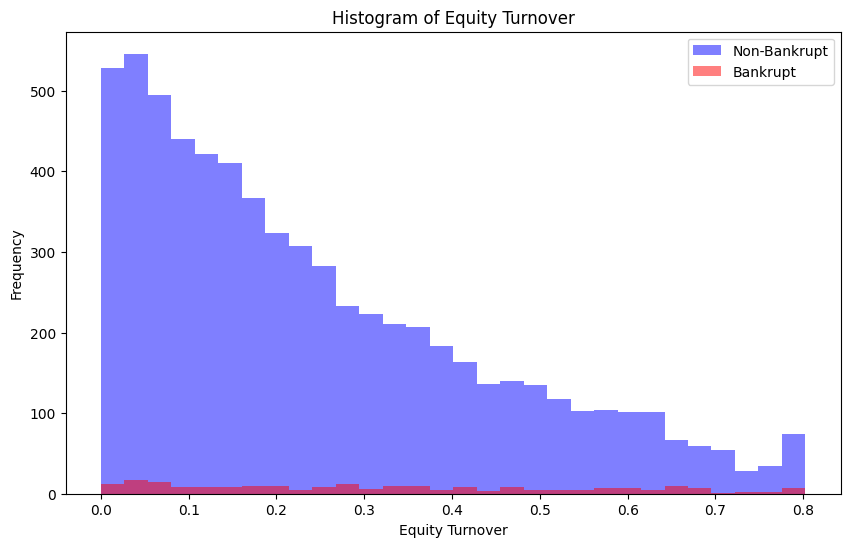

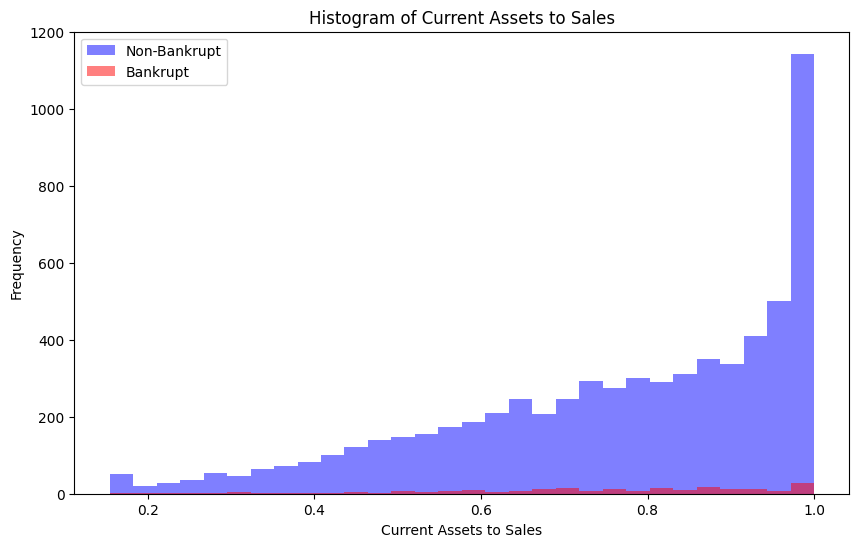

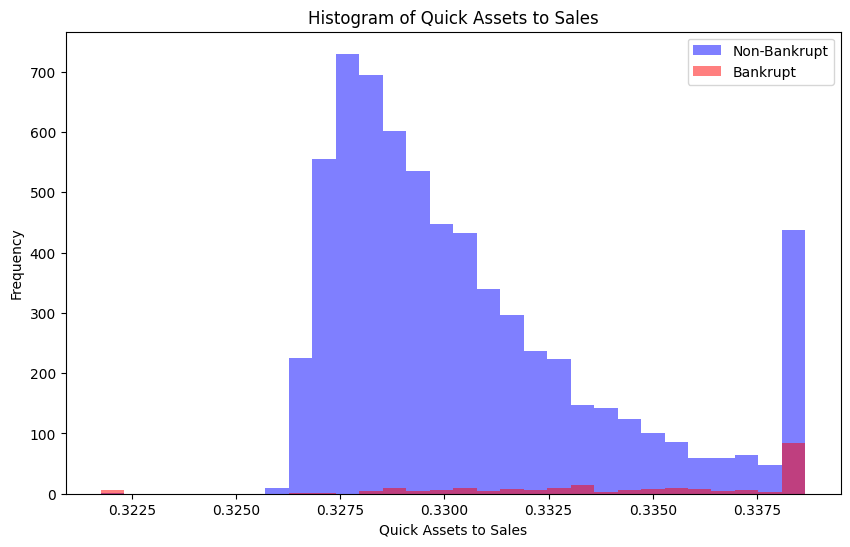

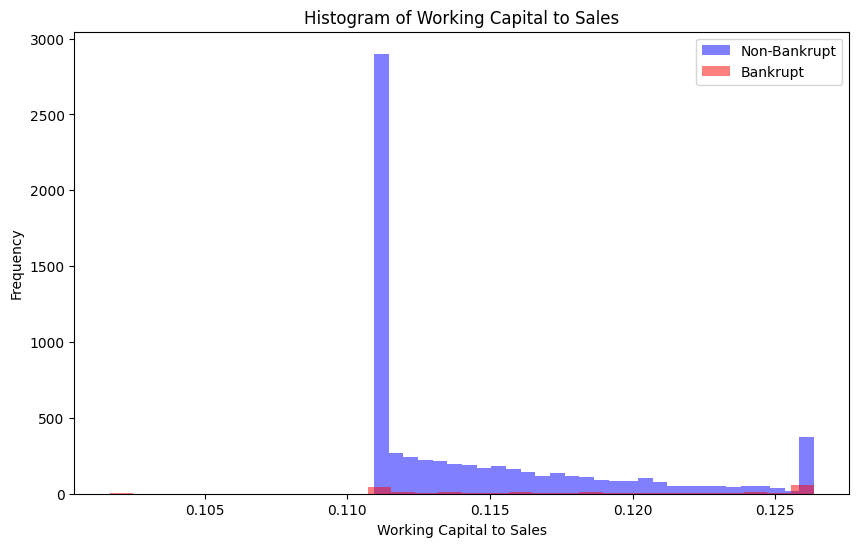

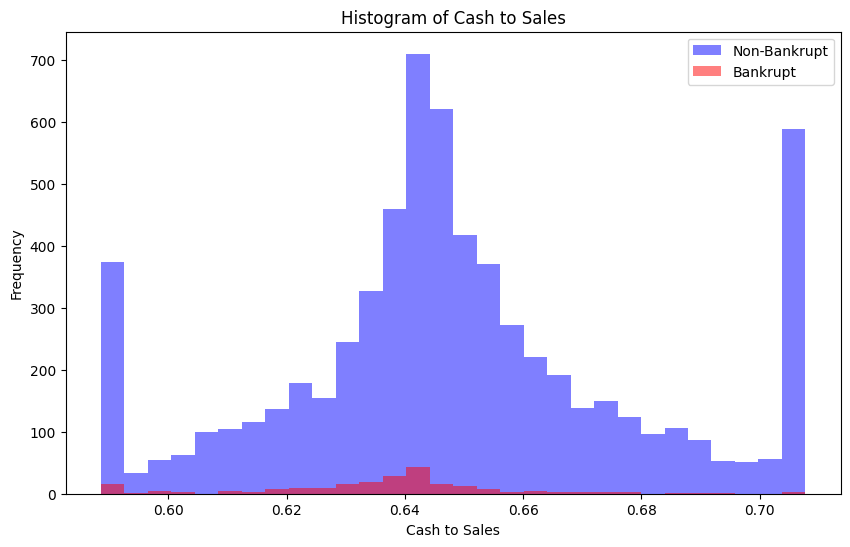

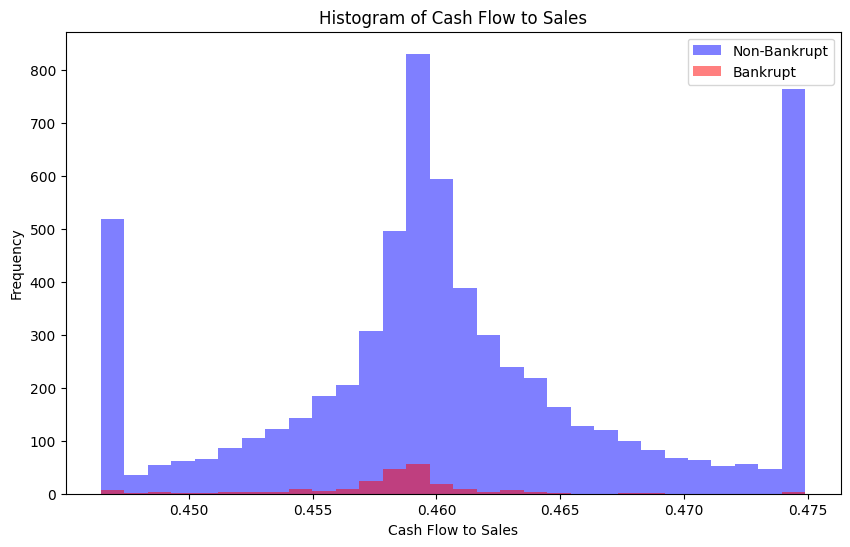

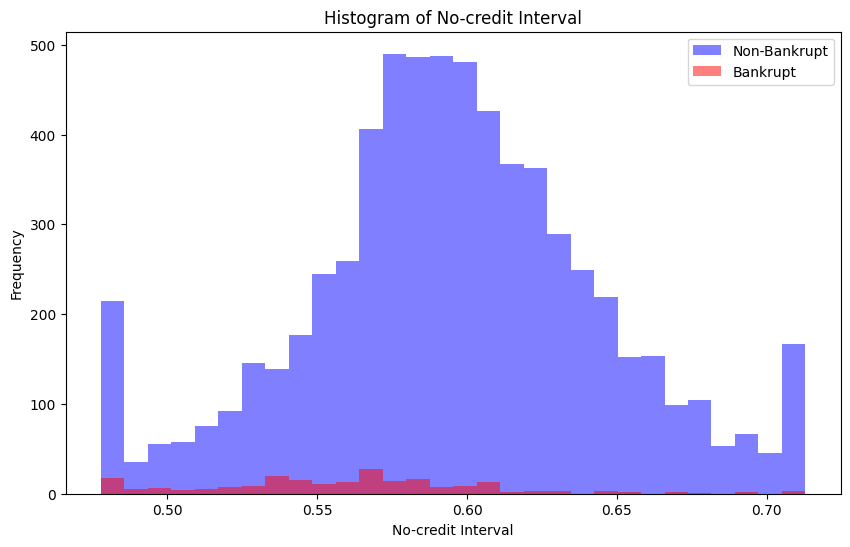

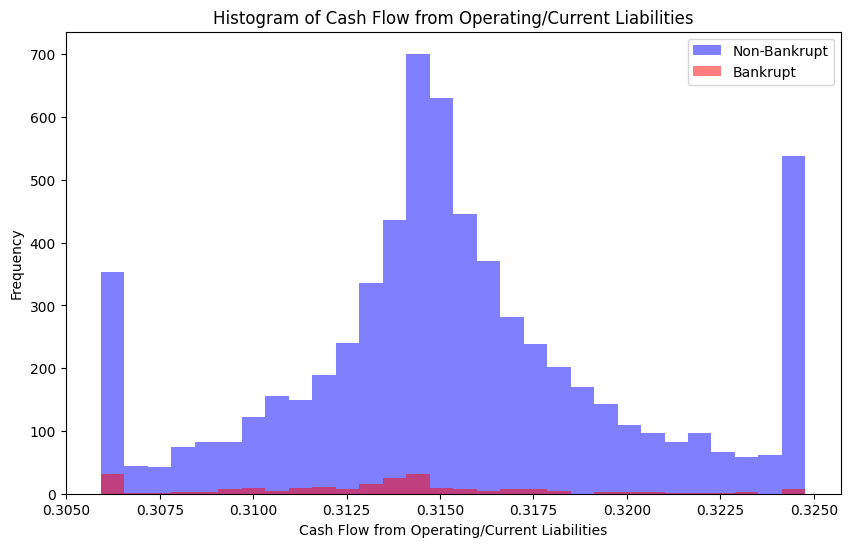

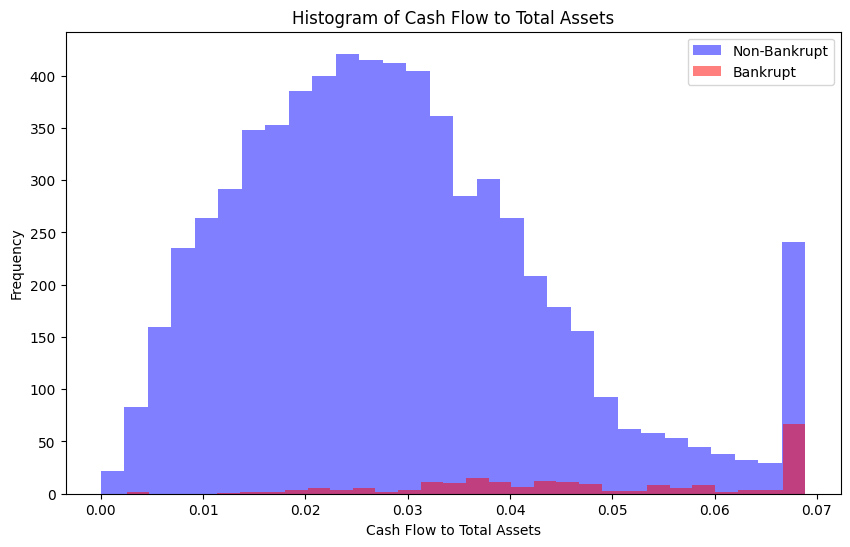

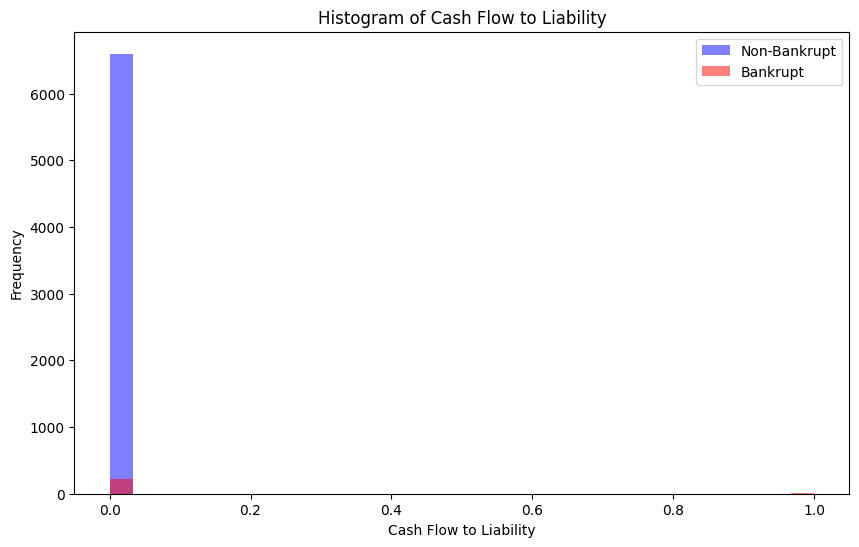

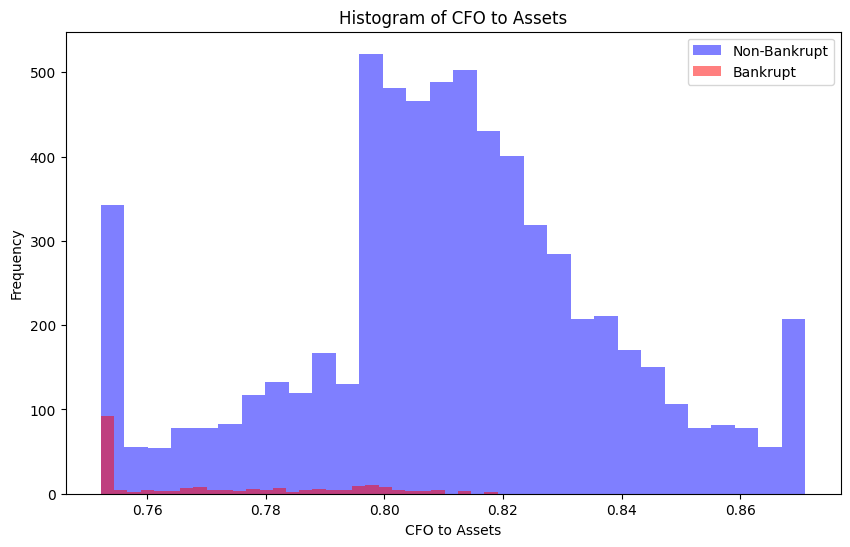

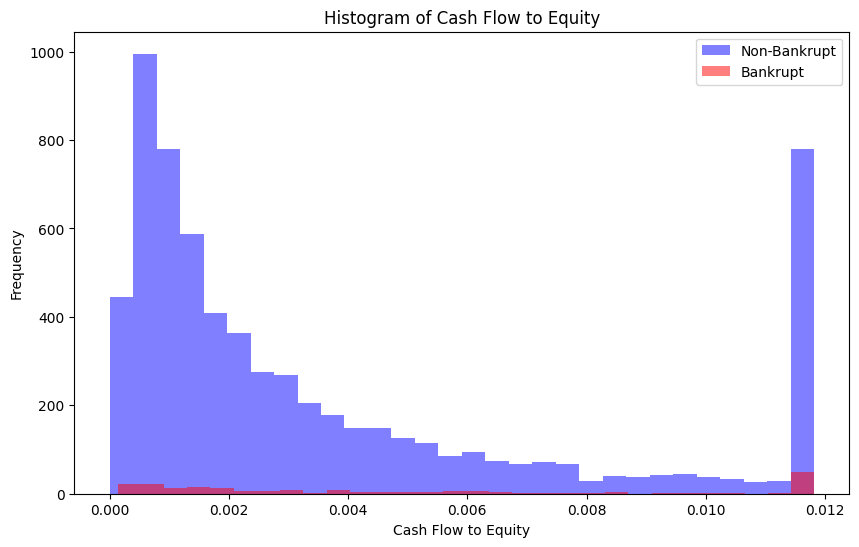

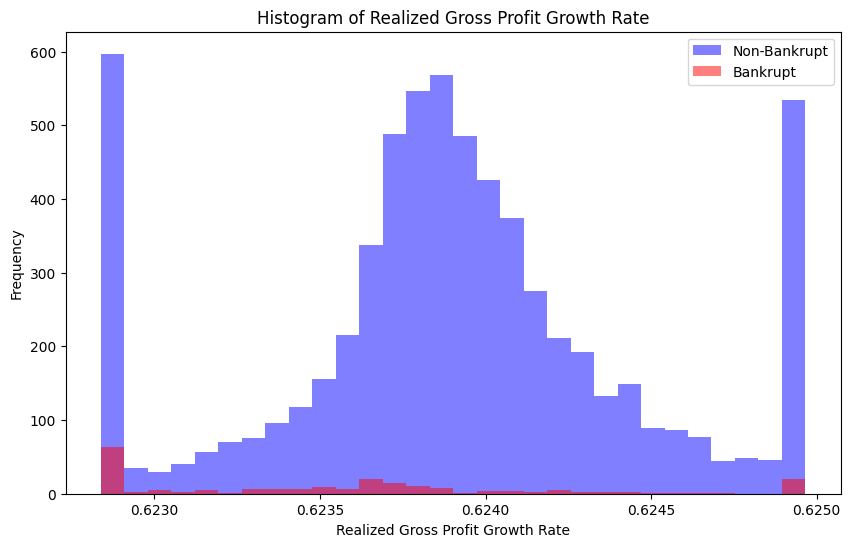

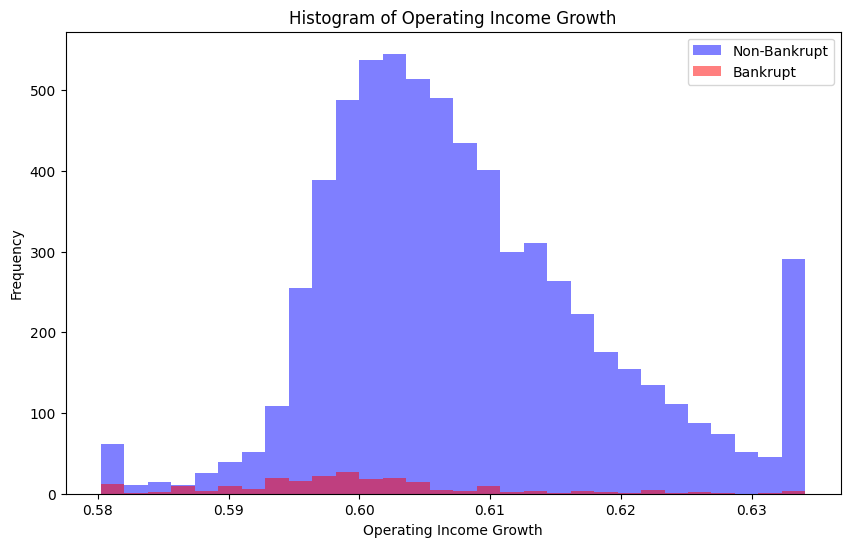

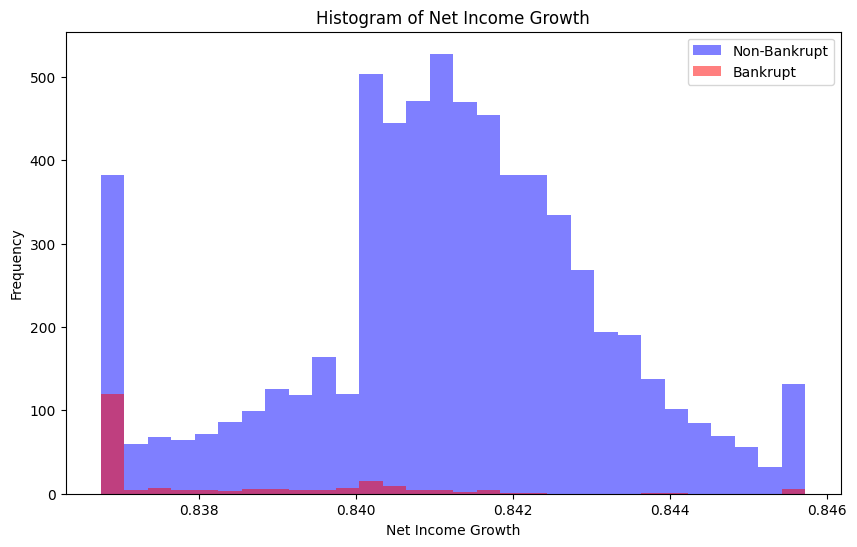

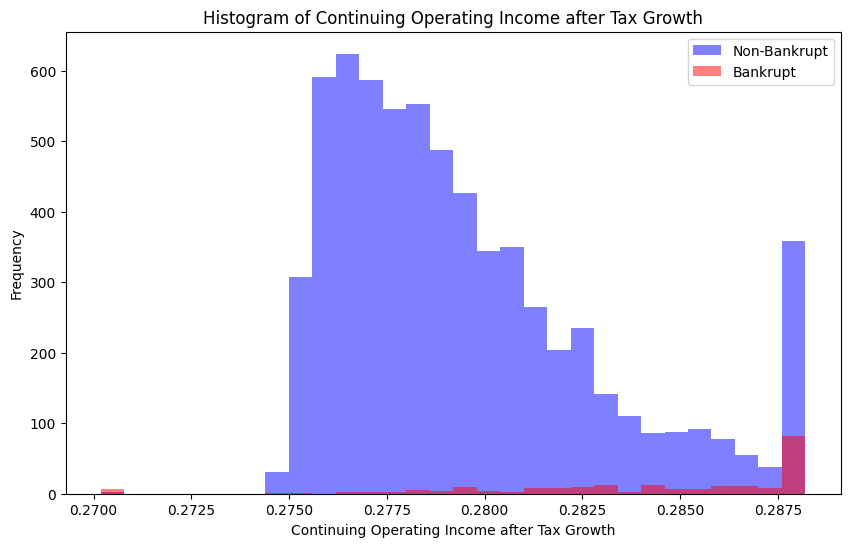

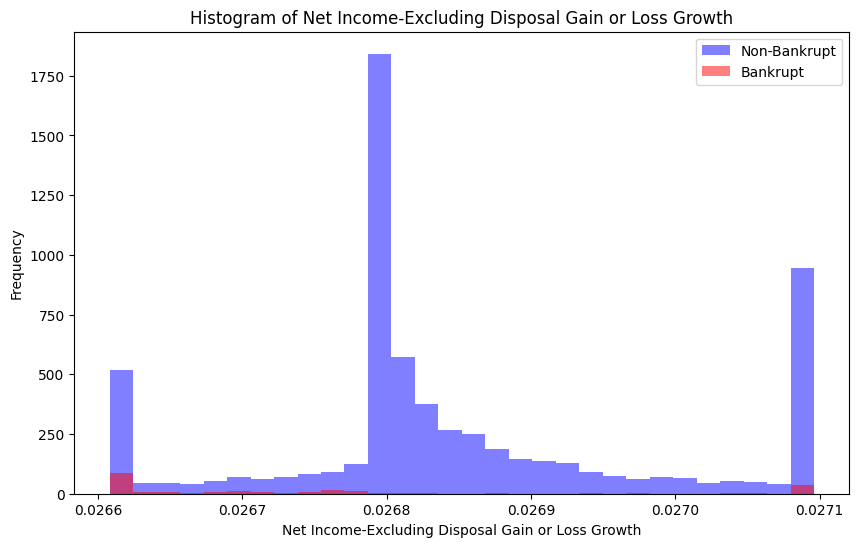

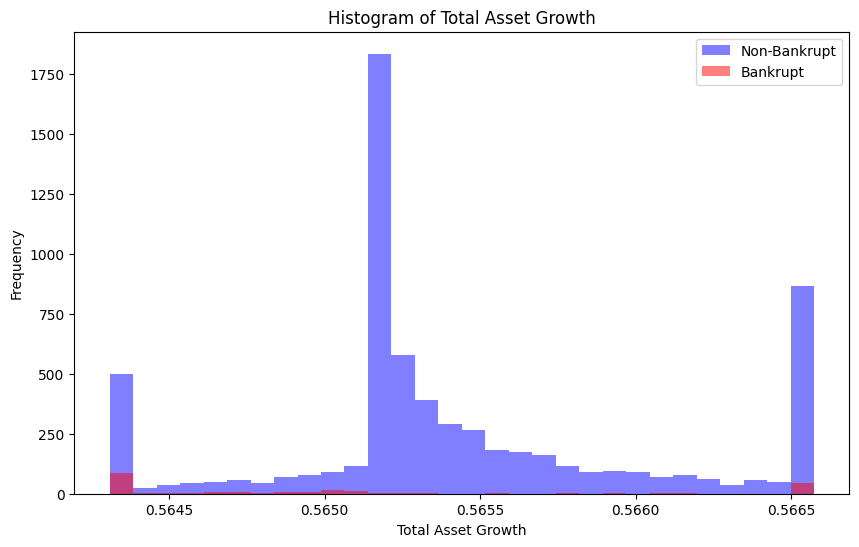

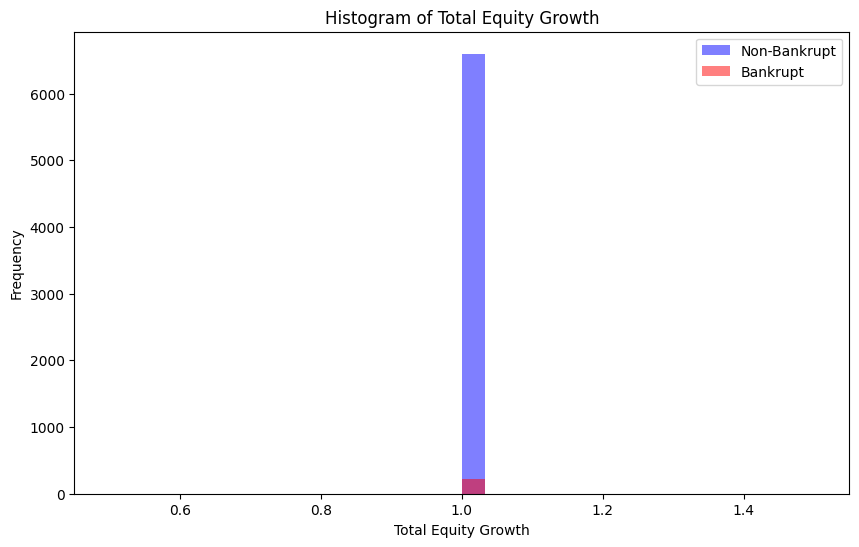

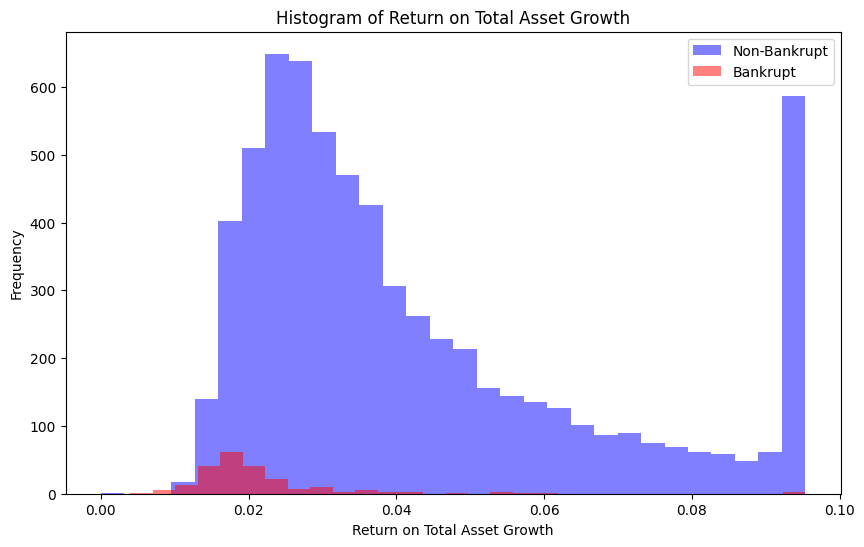

In [38]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    df[df['Bankrupt'] == 0][column].plot(kind='hist', alpha=0.5, label='Non-Bankrupt', color='blue', bins=30)
    df[df['Bankrupt'] == 1][column].plot(kind='hist', alpha=0.5, label='Bankrupt', color='red', bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_19852\2180719350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Bankrupt',data= df,palette ='Reds' )


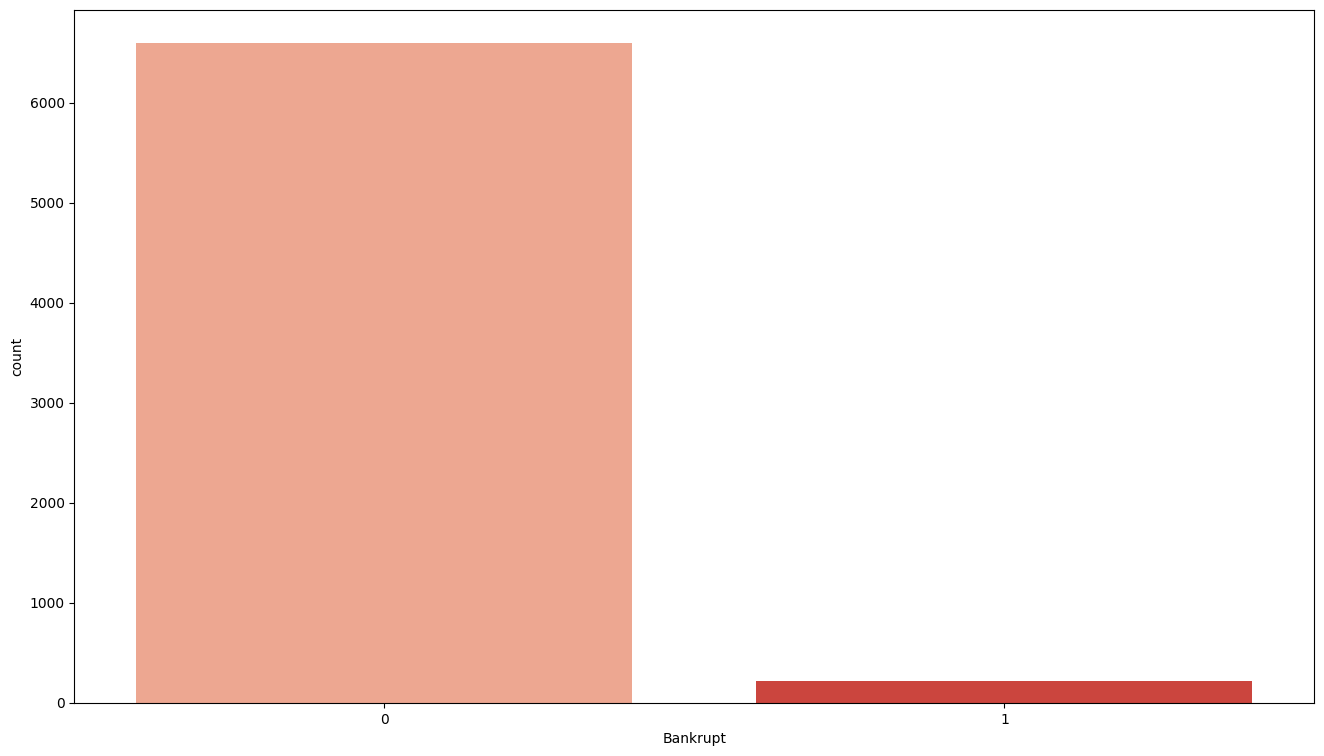

In [39]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt',data= df,palette ='Reds' )
plt.show()

Analyze relationships between features and the target variable.

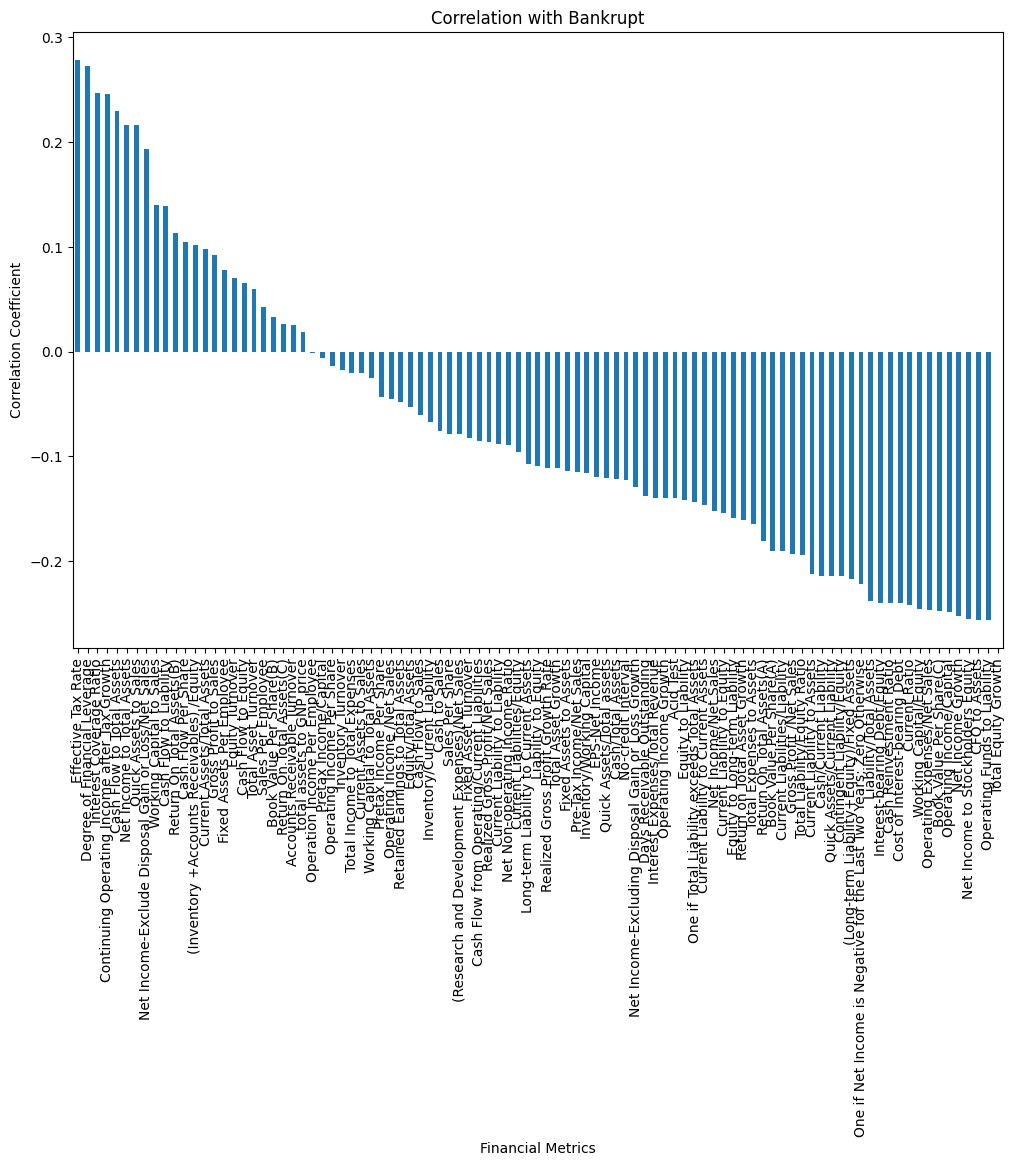

In [40]:
correlation_matrix = df.corr()

# Extract correlation coefficients related to 'Bankrupt'
bankrupt_correlation = correlation_matrix['Bankrupt'].drop('Bankrupt')

# Sort the correlations
sorted_correlations = bankrupt_correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 8))
sorted_correlations.plot(kind='bar')
plt.title('Correlation with Bankrupt')
plt.xlabel('Financial Metrics')
plt.ylabel('Correlation Coefficient')
plt.show()

# Hypothesis Testing:

o Perform hypothesis testing to identify significant features influencing bankruptcy.

In [41]:
variable_of_interest = 'Cost of Interest-bearing Debt'


bankrupt_data = df[df['Bankrupt'] == 1][variable_of_interest]
non_bankrupt_data = df[df['Bankrupt'] == 0][variable_of_interest]


t_statistic, p_value = ttest_ind(bankrupt_data, non_bankrupt_data, equal_var=False)


print(f"Variable: {variable_of_interest}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05 

if p_value < alpha:
    print(f"Reject null hypothesis: There is a significant difference in '{variable_of_interest}' between bankrupt and non-bankrupt companies.")
else:
    print(f"Fail to reject null hypothesis: There is no significant difference in '{variable_of_interest}' between bankrupt and non-bankrupt companies.")


Variable: Cost of Interest-bearing Debt
T-statistic: -25.030232253622586
P-value: 3.9551471524935343e-69
Reject null hypothesis: There is a significant difference in 'Cost of Interest-bearing Debt' between bankrupt and non-bankrupt companies.


# Modelling

In [42]:
selected_features = [
    'Cost of Interest-bearing Debt',
    'Cash Reinvestment Ratio',
    'Current Ratio',
    'Acid Test',
    'Interest Expenses/Total Revenue',
    'Total Liability/Equity Ratio',
    'Liability/Total Assets',
    'Interest-bearing Debt/Equity',
    'Contingent Liability/Equity',
    'Operating Income/Capital'
]
X = df[selected_features]
y = df['Bankrupt']

# Handle missing values if any
X.fillna(X.mean(), inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (for intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Train a logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

         Current function value: 2.637316
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5444
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  -18.09
Time:                        21:14:39   Log-Likelihood:                -14387.
converged:                      False   LL-Null:                       -753.53
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.418e+05   6.51e+04     -3.713      0.000   -3.69e+05   -1.14e+05
Co

C:\Users\hp\AppData\Local\Temp\ipykernel_19852\243818708.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Model Interpretation and Insights:

Regression Insights const (Intercept): -241800.0: This is the baseline log-odds of bankruptcy when all predictors are zero.

Cost of Interest-bearing Debt (coef: 1175.66, p-value: 0.000):

A positive coefficient means higher costs of interest-bearing debt increase the likelihood of bankruptcy. Highly significant predictor (p < 0.001). Cash Reinvestment Ratio (coef: 230.88, p-value: 0.013):

Positive coefficient indicates higher reinvestment ratios are associated with higher bankruptcy risk. Statistically significant predictor (p < 0.05). Current Ratio (coef: -2463.87, p-value: 0.000):

Negative coefficient implies that a higher current ratio (indicating better liquidity) reduces the likelihood of bankruptcy. Highly significant predictor (p < 0.001). Acid Test (coef: -3453.89, p-value: 0.002):

Negative coefficient suggests that higher acid-test ratios (another liquidity measure) reduce bankruptcy risk. Statistically significant predictor (p < 0.01). Interest Expenses/Total Revenue (coef: -90.13, p-value: 0.869):

This variable is not statistically significant (p > 0.05), implying it does not have a meaningful impact on predicting bankruptcy in this model. Total Liability/Equity Ratio (coef: -706.19, p-value: 0.948):

Also not statistically significant and does not contribute meaningfully to the model. Liability/Total Assets (coef: 79220.0, p-value: 0.071):

Positive coefficient suggests higher liabilities relative to assets increase bankruptcy risk. Marginally significant (p < 0.1). Interest-bearing Debt/Equity (coef: 119000.0, p-value: 0.024):

Positive coefficient indicates higher debt relative to equity increases bankruptcy risk. Statistically significant (p < 0.05). Contingent Liability/Equity (coef: -715300.0, p-value: 0.000):

Negative coefficient suggests higher contingent liabilities relative to equity decrease the likelihood of bankruptcy. Highly significant predictor (p < 0.001). Operating Income/Capital (coef: 387300.0, p-value: 0.000):

Positive coefficient means higher operating income relative to capital increases bankruptcy risk. Highly significant predictor (p < 0.001).